Анализ пользовательского спроса на сервиса Яндекс Афиша

Автор: Плохотнюк С.А.

Дата: 19.04.2025

## Цели и задачи проекта

<font color='#777778'>
Цель: анализ пользовательского спроса на сервиса Яндекс Афиша.
Задача: определить факторы, которые влияют на пользовательский спрос, в том числе какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.

Задачи: определить факторы, которые влияют на пользовательский спрос, в том числе какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера.

## Описание данных

<font color='#777778'>Данные
Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:

    order_id — уникальный идентификатор заказа.
    user_id — уникальный идентификатор пользователя.
    c — дата создания заказа (московское время).
    created_ts_msk — дата и время создания заказа (московское время).
    event_id — идентификатор мероприятия из таблицы events.
    cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
    age_limit — возрастное ограничение мероприятия.
    currency_code — валюта оплаты, например rub для российских рублей.
    device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
    revenue — выручка от заказа.
    service_name — название билетного оператора.
    tickets_count — количество купленных билетов.
    total — общая сумма заказа.

В данные также был добавлен столбец days_since_prev с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.
Второй датасет final_tickets_events_df содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Обратите внимание, что из данных исключили фильмы, ведь, как было видно на дашборде, событий такого типа не так много. Датасет содержит такие поля:

    event_id — уникальный идентификатор мероприятия.
    event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
    event_type_description — описание типа мероприятия.
    event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
    organizers — организаторы мероприятия.
    region_name — название региона.
    city_name — название города.
    venue_id — уникальный идентификатор площадки.
    venue_name — название площадки.
    venue_address — адрес площадки.

Анализ данных в предыдущей части проекта показал, что выручка от заказов представлена в двух валютах — российских рублях и казахстанских тенге. Для удобства решения было бы корректно привести данные к одной валюте, например к российским рублям. Для этого в вашем распоряжении будет датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:

    nominal — номинал (100 тенге).
    data — дата.
    curs — курс тенге к рублю.
    cdx — обозначение валюты (kzt).

## Содержимое проекта

<font color='#777778'> 
1. импорт библиотек и ознакомление в данными <br>
2. Предобработка данных<br>
3. Аналитическая работа<br>
3.1.Исследовательский анализ данных<br>
Анализ распределения заказов по сегментам и их сезонные изменения<br>
3.2. Осенняя активность пользователей. Анализ активности пользователей осенью 2024 года<br> 
3.3. Популярные события и партнёры<br>
3.4. Статистический анализ данных<br>
Проверка несколько гипотез относительно активности пользователей мобильных и стационарных устройств: <br> 
-Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройст
Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
5. Выводы<br>
6. Рекомендации

## Загрузка данных и знакомство с ними
<font color='#777778'> 

In [1]:
# Импортируем библиотеки
import pandas as pd
from scipy.stats import mannwhitneyu
# Загружаем библиотеки для визуализации данных
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns 

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Выгружаем путь к final_tickets_orders_df.csv
final_tickets_orders = '/datasets/final_tickets_orders_df.csv'

In [3]:
# Загружаем данные в DataFrame
df_final_tickets_orders = pd.read_csv(final_tickets_orders)
#Выводим первые строки для ознакомления
display(df_final_tickets_orders.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.94",Край билетов,4,"10,870.99",NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,"2,067.51",NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,"1,258.57",За билетом!,4,"13,984.16",75.00
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,"1,390.41",Билеты без проблем,3,"10,695.43",83.00


In [4]:
# Выводим информацию о датафрейм
df_final_tickets_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
# Проверка на пропуски
orders_isna = df_final_tickets_orders.isna().sum()
# Выводим количество пропусков в каждом столбце
print(orders_isna)

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64


<font color='#777778'> датасет df_final_tickets_orders содержить 14 колонок, 290848 строк. Тип данных: float64(3 колонки), int64(4 колонки), object(7 колонок)
Объем: 31.1+ MB.
Все строки содержат данные, пропуски есть только в столбце days_since_prev 21940 пропусков. Это обьяснимо содержимым столбца. Столбец содуржит сведения о предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.Поэтому, данный столбец оставим без изменений.

In [6]:
# Выгружаем путь к final_tickets_orders_df.csv
final_tickets_events = '/datasets/final_tickets_events_df.csv'

In [7]:
# Загружаем данные в DataFrame
df_final_tickets_events = pd.read_csv(final_tickets_events)
#Выводим первые строки для ознакомления
display(df_final_tickets_events.head())

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [8]:
# Выводим информацию о датафрейм
df_final_tickets_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [9]:
# Проверка на пропуски
orders_isna = df_final_tickets_events.isna().sum()
# Выводим количество пропусков в каждом столбце
print(orders_isna)

event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64


<font color='#777778'> датасет df_final_tickets_events содержить 11 колонок, 22426 строк. Тип данных: int64(3 колонки), object(8 колонок)
Объем: 1.9+ MB.
Все строки содержат данные, пропусков нет.

In [10]:
# Выгружаем путь к final_tickets_orders_df.csv
final_tickets_tenge = '/datasets/final_tickets_tenge_df.csv'
# Загружаем данные в DataFrame
final_tickets_tenge = pd.read_csv(final_tickets_tenge)
#Выводим первые строки для ознакомления
display(final_tickets_tenge.head())

,data,nominal,curs,cdx
0,2024-01-10,100,19.94,kzt
1,2024-01-11,100,19.73,kzt
2,2024-01-12,100,19.58,kzt
3,2024-01-13,100,19.45,kzt
4,2024-01-14,100,19.45,kzt


In [11]:
# Выводим информацию о датафрейм
final_tickets_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [12]:
# Проверка на пропуски
final_tickets_tenge_isna = final_tickets_tenge.isna().sum()
# Выводим количество пропусков в каждом столбце
print(final_tickets_tenge_isna)

data       0
nominal    0
curs       0
cdx        0
dtype: int64


<font color='#777778'> датасет final_tickets_tenge содержить 4 колонки, 356 строк. Тип данных: float64(1), int64(1), object(2)
обьем данных: 11.3+ KB
Все строки содержат данные, пропусков нет. Явных дубликатов нет

## Предобработка данных
<font color='#777778'>

In [13]:
#Приведение колонок к типу данных data
df_final_tickets_orders['created_dt_msk'] = pd.to_datetime(df_final_tickets_orders['created_dt_msk'], errors='coerce')
df_final_tickets_orders['created_dt_msk'] = pd.to_datetime(df_final_tickets_orders['created_dt_msk'], errors='coerce')
df_final_tickets_orders['created_ ts_msk'] = pd.to_datetime(df_final_tickets_orders['created_dt_msk'])
df_final_tickets_orders.head() 

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,created_ ts_msk
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.94",Край билетов,4,"10,870.99",NaN,2024-08-20
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,"2,067.51",NaN,2024-07-23
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,"1,258.57",За билетом!,4,"13,984.16",75.00,2024-10-06
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2024-07-13
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,"1,390.41",Билеты без проблем,3,"10,695.43",83.00,2024-10-04


In [14]:
#Приведение колонок к типу данных data в датасепте final_tickets_tenge столбец data
final_tickets_tenge['data'] = pd.to_datetime(final_tickets_tenge['data'])
final_tickets_tenge['data'] = pd.to_datetime(final_tickets_tenge['data']).dt.date #получить дату из даты и времени
final_tickets_tenge['data'] = pd.to_datetime(final_tickets_tenge['data']).dt.date
df_final_tickets_orders.head() 

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,created_ ts_msk
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.94",Край билетов,4,"10,870.99",NaN,2024-08-20
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,"2,067.51",NaN,2024-07-23
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,"1,258.57",За билетом!,4,"13,984.16",75.00,2024-10-06
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2024-07-13
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,"1,390.41",Билеты без проблем,3,"10,695.43",83.00,2024-10-04


In [15]:
# Получаем количество каждого уникального значения в столбце 'cinema_circuit'  в датасете df_final_tickets_orders
cinema_circuit_counts = df_final_tickets_orders['cinema_circuit'].value_counts()

# Вычисляем долю значений "нет"
cinema_circuit_counts_neu = (df_final_tickets_orders[df_final_tickets_orders['cinema_circuit'] == 'нет'].shape[0]) / df_final_tickets_orders['cinema_circuit'].count()

# Выводим долю значений "нет"
print("Доля значений 'нет':", cinema_circuit_counts_neu)

Доля значений 'нет': 0.9951933821329968


<font color='#777778'>В строке cinema_circuit датасета df_final_tickets_orders Доля значений 'нет' - нет данных составляет почти 100 %. Использование в стат.анализе данной колонки нецелесообразно

In [16]:
# Рассмотрим уникальные зачения в столбце 'age_limit' в датасете df_final_tickets_orders
age_limit_unique = df_final_tickets_orders['age_limit'].unique()
# Выводим уникальные значения
print("уникальные значения в столбце:", age_limit_unique)

уникальные значения в столбце: [16  0 18 12  6]


In [17]:
# Рассмотрим уникальные зачения в столбце 'device_type_canonical' в датасете df_final_tickets_orders
device_type_canonical_unique = df_final_tickets_orders['device_type_canonical'].unique()
# Выводим уникальные значения
print("уникальные значения в столбце:", device_type_canonical_unique)

уникальные значения в столбце: ['mobile' 'desktop']


In [18]:
# Рассмотрим уникальные зачения в столбце 'service_name' в датасете df_final_tickets_orders
service_name_unique = df_final_tickets_orders['service_name'].unique()
# Выводим уникальные значения
print("уникальные значения в столбце:", service_name_unique)

уникальные значения в столбце: ['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']


In [19]:
# Рассмотрим уникальные зачения в столбце 'event_type_description' в датасете df_final_tickets_events
event_type_description_unique = df_final_tickets_events['event_type_description'].unique()
# Выводим уникальные значения
print("уникальные значения в столбце:", event_type_description_unique)

уникальные значения в столбце: ['спектакль' 'балет' 'мюзикл' 'опера' 'концерт' 'шоу' 'ёлка'
 'цирковое шоу' 'событие' 'фестиваль' 'спортивное мероприятие' 'выставка'
 'спорт' 'оперетта' 'экскурсия' 'рок-мюзикл' 'музыкальный спектакль'
 'снегурочка' 'подарок' 'кукольный спектакль']


In [20]:
# Рассмотрим уникальные зачения в столбце 'region_name' в датасете df_final_tickets_events
region_name_unique = df_final_tickets_events['region_name'].unique()
# Выводим уникальные значения
print("уникальные значения в столбце:", region_name_unique)

уникальные значения в столбце: ['Североярская область' 'Светополянский округ' 'Каменевский регион'
 'Лесодальний край' 'Медовская область' 'Широковская область'
 'Тепляковская область' 'Травяная область' 'Зоринский регион'
 'Серебринская область' 'Яблоневская область' 'Глиногорская область'
 'Речиновская область' 'Озернинский край' 'Горицветская область'
 'Солнечнореченская область' 'Травиницкий округ' 'Солнечноземская область'
 'Ключеводский округ' 'Островная область' 'Луговая область'
 'Каменноозёрный край' 'Лесостепной край' 'Зеленоградский округ'
 'Поленовский край' 'Лугоградская область' 'Синегорский регион'
 'Малиновая область' 'Речицкая область' 'Дальнеземская область'
 'Заречная область' 'Североозёрский округ' 'Дальнезорский край'
 'Малиновоярский округ' 'Сосновская область' 'Златопольский округ'
 'Ягодиновская область' 'Берестовский округ' 'Золотоключевской край'
 'Каменноярский край' 'Голубевский округ' 'Боровлянский край'
 'Тихореченская область' 'Миропольская область' 'Раду

In [21]:
# Рассмотрим уникальные зачения в столбце 'venue_name' в датасете df_final_tickets_events
venue_name_unique = df_final_tickets_events['venue_name'].unique()
# Выводим уникальные значения
print("уникальные значения в столбце:", venue_name_unique)

уникальные значения в столбце: ['Кладбище искусств "Проблема" и партнеры'
 'Лекции по искусству "Свет" Групп' 'Кинокомитет "Золотая" Инк' ...
 'Эстрадный театр "Вытяжка" Лимитед' 'Школа композиции "Окно" Лимитед'
 'Клуб современных танцев "Кофе" Групп']


<font color='#777778'>Отлично. Столбцы age_limit, device_type_canonical, service_name,event_type_description,  region_name, venue_name заполнены корректно. Ошибок, скрытый пропусков не выявлено

In [22]:
# Получаем количество каждого уникального значения в столбце 'currency_code'
currency_code_counts = df_final_tickets_orders['currency_code'].value_counts()
currency_code_counts

rub    285780
kzt      5069
Name: currency_code, dtype: int64

<font color='#777778'>столбец currency_code заполнен корректно и представлен данными валюты: rub в количестве 285780  строк и kzt в количестве 5069 строк. тип анных соответствует.

In [23]:
# Проверка на явные дубликаты
final_tickets_orders_duplicates = df_final_tickets_orders.duplicated().sum()

# Выводим количество дубликатов
print("Количество явных дубликатов в df_final_tickets_orders:", final_tickets_orders_duplicates)

Количество явных дубликатов в df_final_tickets_orders: 0


In [24]:
# Проверка на явные дубликаты
final_tickets_events_duplicates = df_final_tickets_events.duplicated().sum()

# Выводим количество дубликатов
print("Количество явных дубликатов в df_final_tickets_events:", final_tickets_events_duplicates)

Количество явных дубликатов в df_final_tickets_events: 0


In [25]:
# Проверка на дубликаты по столбцу 'order_id'
duplicates_order_id = df_final_tickets_orders.duplicated(subset=['order_id'])
print(f"\nКоличество дубликатов по order_id - индентификатор заказа: {duplicates_order_id.sum()}")


Количество дубликатов по order_id - индентификатор заказа: 0


In [26]:
# Проверка на дубликаты по всем столбцам, кроме 'order_id'
duplicates_duplicated_order_id = df_final_tickets_orders.duplicated(subset=df_final_tickets_orders.columns.difference(['order_id'])).sum()

# Выводим количество дубликатов
print("Количество дубликатов (без учета 'order_id'):", duplicates_duplicated_order_id)


Количество дубликатов (без учета 'order_id'): 30


In [27]:
# Получаем дубликаты без учета 'order_id'
duplicate_rows_excluding_order_id = df_final_tickets_orders[
    df_final_tickets_orders.duplicated(subset=df_final_tickets_orders.columns.difference(['order_id']))]

# Удаляем столбец 'order_id' из результата
duplicate_order_id = duplicate_rows_excluding_order_id.drop(columns=['order_id'])

# Выводим дубликаты
display("Дубликаты (без учета 'order_id'):")
display(duplicate_order_id.head())

"Дубликаты (без учета 'order_id'):"

,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,created_ ts_msk
11778,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,Билеты в руки,1,997.48,0.00,2024-08-13
57220,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,Лови билет!,2,280.81,0.00,2024-10-30
84015,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,Билеты в руки,3,739.85,0.00,2024-06-25
148477,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,Лучшие билеты,4,674.12,0.00,2024-10-28
154173,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,Билеты без проблем,1,"3,170.95",0.00,2024-08-23


<font color='#777778'>Выявлено 39161 неявный дубликат (13% от общего числа строк) в датасете df_final_tickets_orders без учета order_id. Следует предполагать, что один и тот же пользователь мог одновременно покупать нескольно билетов на одно и тоже мероприятие, но система каждый билет рассматривала, как отдельный номер заказа.<br>
Учитываая долю неявных дубликатов, удаление данных может привести к искажению статистических данных.

In [28]:
# Объединяем оба датасета df_final_tickets_orders и df_final_tickets_events по столбцу event_id
df = pd.merge(df_final_tickets_orders, df_final_tickets_events, on='event_id', how='inner')

# Выводим результат
display(df.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,"1,521.94",...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,"1,902.42",...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,"1,141.45",...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,"1,902.42",...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,"1,521.94",...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int64         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  object        
 4   event_id                290611 non-null  int64         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int64         
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int64         
 12  total                   290611

In [30]:
df.isnull().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
created_ ts_msk               0
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

In [31]:
# Проверка на дубликаты
df_duplicates = df.duplicated().sum()
print('Количество явных дубликатов в объединенном датасете: {}'.format(df_duplicates))

Количество явных дубликатов в объединенном датасете: 0


In [32]:
# Выведим новый столбец revenue_rub (выручку с заказа к единой валюте — российскому рублю)
# Добавляем новый столбец revenue_rub, копируя значения из существующего столбца revenue
df['revenue_rub'] = df['revenue']

# Получаем nominal_rate
nominal_rate = final_tickets_tenge['curs'] 

# Конвертируем выручку в рубли для тех строк, где валюта не рубли
df.loc[df['currency_code'] != 'rub', 'revenue_rub'] = (df['revenue'] * nominal_rate)/100

# Выводим первые несколько строк DataFrame для проверки
print(df.head())

   order_id          user_id created_dt_msk       created_ts_msk  event_id  \
0   4359165  0002849b70a3ce2     2024-08-20  2024-08-20 16:08:03    169230   
1   7431164  024dc5236465850     2024-07-23  2024-07-23 20:52:02    169230   
2   7431106  024dc5236465850     2024-07-23  2024-07-23 20:54:19    169230   
3   7431135  024dc5236465850     2024-07-23  2024-07-23 20:59:44    169230   
4   7431048  024dc5236465850     2024-07-23  2024-07-23 21:02:08    169230   

  cinema_circuit  age_limit currency_code device_type_canonical  revenue  ...  \
0            нет         16           rub                mobile 1,521.94  ...   
1            нет         16           rub                mobile 1,902.42  ...   
2            нет         16           rub                mobile 1,141.45  ...   
3            нет         16           rub                mobile 1,902.42  ...   
4            нет         16           rub                mobile 1,521.94  ...   

  event_type_description  event_type_main  o

In [33]:
#Посмотрите на распределение выручки по столбцу revenue
df['revenue_rub'].describe() 

count   285,542.00
mean        548.01
std         871.75
min         -90.76
25%         114.17
50%         346.63
75%         793.32
max      81,174.54
Name: revenue_rub, dtype: float64

<font color='#777778'> Выручка в рублевом эквиваленте зафиксирована в 285542 строках. Среднее значение (548 руб.)отличается от стандартного (871 руб.). но незначительно.
Максимальное значение составляет 81174 рубля, минимальное -90. отрицательные значения, возможно, это возвраты.

In [34]:
#Посмотрите на распределение число закаков по столбцу tickets_count
df['tickets_count'].describe() 

count   290,611.00
mean          2.75
std           1.17
min           1.00
25%           2.00
50%           3.00
75%           4.00
max          57.00
Name: tickets_count, dtype: float64

<font color='#777778'> Количество купленных билетов зафиксировано в  290611 строках. Среднее значение (2,7 билета) отличается от стандартного (1,1).
Максимальное значение составляет 57 билетов. вероятно выбросы, минимальное - 1.

In [35]:
# Фильтруем DataFrame по условиям: валюта 'rub' и выручка больше или равна 0
df_rub= df[
    (df['currency_code'] == 'rub') & 
    (df['revenue'] >= 0)
]['revenue'].describe()

# Выводим результат
print(df_rub)

count   285,161.00
mean        548.75
std         872.10
min           0.00
25%         114.89
50%         347.95
75%         794.80
max      81,174.54
Name: revenue, dtype: float64


<font color='#777778'> Без отрицательных значений сохраняетс яразница между средними(548) и стандартным отклонением (872)

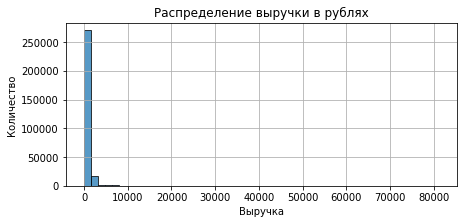

In [36]:
# Строим гистограмму
plt.figure(figsize=(7, 3))

df['revenue'].plot(
    kind='hist', 
    bins=50, 
    alpha=0.75,
    edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')
plt.ylabel('Количество')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<font color='#777778'>имеются выбросы, о чем свидетельствует вытянутый хвост вправо. 

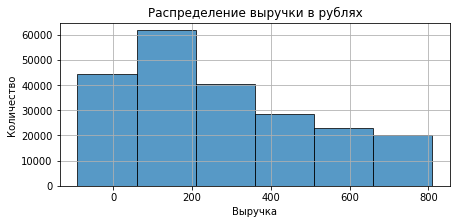

In [37]:
#Оставим значения, которые будут меньше 75%-го процентиля этого ряда значений или равны ему. 
cleaned_df = df[df['revenue'] <= df['revenue'].quantile(0.75)]['revenue']

plt.figure(figsize=(7, 3))

# Строим гистограмму 
cleaned_df.plot(
                kind='hist', 
                bins=6, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')
plt.ylabel('Количество')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

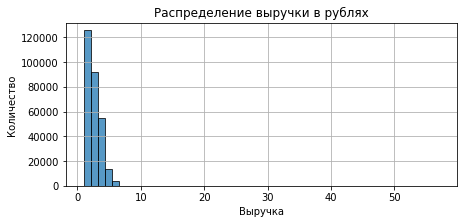

In [38]:
# Строим гистограмму по заказам
plt.figure(figsize=(7, 3))

df['tickets_count'].plot(
    kind='hist', 
    bins=50, 
    alpha=0.75,
    edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки в рублях')
plt.xlabel('Выручка')
plt.ylabel('Количество')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<font color='#777778'>имеются выбросы, о чем свидетельствует вытянутый хвост вправо. 

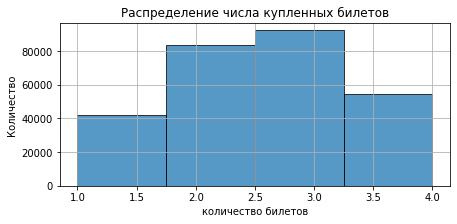

In [39]:
#Оставим значения, которые будут меньше 75%-го процентиля этого ряда значений или равны ему. 
cleaned_df = df[df['tickets_count'] <= df['tickets_count'].quantile(0.75)]['tickets_count']

plt.figure(figsize=(7, 3))

# Строим гистограмму 
cleaned_df.plot(
                kind='hist', 
                bins=4, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение числа купленных билетов')
plt.xlabel('количество билетов')
plt.ylabel('Количество')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

<font color='#777778'>выбросы удалены. Осталены данные меньше 75%-го процентиля по выручке и числу купленных билетов.

In [40]:
#рассчитаем выручку с продажи одного билета на мероприятие.
one_ticket_revenue_rub = round(df['revenue_rub'].sum()/df['tickets_count'].count(),2)
print("Выручку с продажи одного билета на мероприятие составила рублей:", one_ticket_revenue_rub)

Выручку с продажи одного билета на мероприятие составила рублей: 538.46


In [41]:
# Создаем новый столбец 'month', выделяя из даты месяц
df['month'] = df['created_dt_msk'].dt.month

# Выводим результат
print(df)

        order_id          user_id created_dt_msk       created_ts_msk  \
0        4359165  0002849b70a3ce2     2024-08-20  2024-08-20 16:08:03   
1        7431164  024dc5236465850     2024-07-23  2024-07-23 20:52:02   
2        7431106  024dc5236465850     2024-07-23  2024-07-23 20:54:19   
3        7431135  024dc5236465850     2024-07-23  2024-07-23 20:59:44   
4        7431048  024dc5236465850     2024-07-23  2024-07-23 21:02:08   
...          ...              ...            ...                  ...   
290606   7375078  ff684621b134cc4     2024-10-06  2024-10-06 12:32:09   
290607    343390  ff684621b134cc4     2024-10-31  2024-10-31 12:27:42   
290608   7378935  ff6bf53a0207b52     2024-10-02  2024-10-02 20:58:31   
290609    195084  ffdadadd5de9c4b     2024-07-22  2024-07-22 13:44:54   
290610   2938020  ffdfac9273f943b     2024-10-22  2024-10-22 09:30:54   

        event_id cinema_circuit  age_limit currency_code  \
0         169230            нет         16           rub   
1  

In [42]:
# Создаем новый столбец 'month', выделяя из даты месяц
df['month'] = df['created_dt_msk'].dt.month

# Создаем новый столбец 'season' на основе месяца
df['season'] = df['month'].apply(
    lambda x: 'зима' if x in [12, 1, 2] else 
               ('весна' if x in [3, 4, 5] else 
                ('лето' if x in [6, 7, 8] else 
                 'осень'))
)
# Выводим результат
print(df)

        order_id          user_id created_dt_msk       created_ts_msk  \
0        4359165  0002849b70a3ce2     2024-08-20  2024-08-20 16:08:03   
1        7431164  024dc5236465850     2024-07-23  2024-07-23 20:52:02   
2        7431106  024dc5236465850     2024-07-23  2024-07-23 20:54:19   
3        7431135  024dc5236465850     2024-07-23  2024-07-23 20:59:44   
4        7431048  024dc5236465850     2024-07-23  2024-07-23 21:02:08   
...          ...              ...            ...                  ...   
290606   7375078  ff684621b134cc4     2024-10-06  2024-10-06 12:32:09   
290607    343390  ff684621b134cc4     2024-10-31  2024-10-31 12:27:42   
290608   7378935  ff6bf53a0207b52     2024-10-02  2024-10-02 20:58:31   
290609    195084  ffdadadd5de9c4b     2024-07-22  2024-07-22 13:44:54   
290610   2938020  ffdfac9273f943b     2024-10-22  2024-10-22 09:30:54   

        event_id cinema_circuit  age_limit currency_code  \
0         169230            нет         16           rub   
1  

Первоначально:
датасет df_final_tickets_orders представлен 14 колонками, 290848 строками. <br>
Тип данных: float64(3 колонки), int64(4 колонки), object(7 колонок) Объем: 31.1+ MB. 
Явных пропусков нет.  <br>
Все строки содержат данные, пропуски есть только в столбце days_since_prev 21940 пропусков. Это обьяснимо содержимым столбца. Столбец содуржит сведения о предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.Поэтому, данный столбец оставим без изменений.<br>

В строке cinema_circuit датасета df_final_tickets_orders Доля значений 'нет' - нет данных составляет почти 100 %. Использование в стат.анализе данной колонки нецелесообразно.<br>
Столбец currency_code, необходимый для стат.анализа, заполнен корректно и представлен данными валюты: rub в количестве 285780  строк и kzt в количестве 5069 строк. тип анных соответствует.<br>
Количество явных дубликатов: 0. Выявлено 39161 неявный дубликат в тадасете df_final_tickets_orders без учета order_id. Следует предполагать, что один и тот же пользователь мог одновременно покупать нескольно билетов на одно и тоже мероприятие, но система каждый билет рассматривала, как отдельный номер заказа.<br>

Датасет df_final_tickets_orders представлен 11 колонками, 22426 строками. <br>
Тип данных: int64(3 колонки), object(8 колонок)
Объем: 1.9+ MB.<br>
Все строки содержат данные, явных пропусков нет.<br>
Колонка final_tickets_tenge['data'] приведены к типу data.
Количество явных дубликатов: 0 <br>

датасет final_tickets_tenge содержить 4 колонки, 356 строк. Тип данных: float64(1), int64(1), object(2)
обьем данных: 11.3+ KB<br>
Все строки содержат данные, пропусков нет. Явных дубликатов нет.<br><br>

В обьединенном датасете df имеется 290610 строк и 24 колонки. Тип данных представлен: float64(3), int64(6), object(15). Все строки содержат данные, пропуски есть только в столбце days_since_prev 21940 пропусков. Это обьяснимо содержимым столбца. Столбец содуржит сведения о предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.Поэтому, данный столбец оставим без изменений.<br>
Обьем памяти: 55.4+ MB<br>
Дубликатои явных не выявлено. Пропусков не выявлено.
В датасет добавлен столбец revenue_rub (выручку с заказа к единой валюте — российскому рублю путем умножение на курс. Иностранная валюта конвертирована в рубль. <br>
Анализ выручки в рублевом эквиваленте показал: выручка в рублевом эквиваленте зафиксирована в 285542 строках. Среднее значение (548 руб.)отличается от стандартного (871 руб.). но незначительно.<br>
Максимальное значение составляет 81174 рубля, минимальное -90. отрицательные значения, возможно, это возвраты. После удаления отрицительных значений (возможных возвратов), отклонение стандартного значения сохранилось.
Гистограмма доказала, что имеются выбросы, о чем свидетельствует вытянутый хвост вправо. Оставлены значения, которые будут меньше 75%-го процентиля этого ряда значений или равны ему. <br>
Гистограмма по столцу, отражаемому число купленных билетов, также обнаружены выбросу, о чем свидетельствует вытянутый хвост вправо. Оставлены значения, которые будут меньше 75%-го процентиля этого ряда значений или равны ему. <br>
СОзданы новые столбцы: month — выделите месяц оформления заказа в отдельный столбец.
season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.<br>
Посчитана выручку с продажи одного билета на мероприятие составила 538.46 рублей


## Исследовательский анализ данных
<font color='#777778'>

In [43]:
# Группируем по сезону и считаем количество заказов
season_orders = df.groupby('season')['order_id'].count()

# Выводим результат
season_orders

season
лето     120436
осень    170175
Name: order_id, dtype: int64

<font color='#777778'>Осенью потребительная активность выше, чем летом. 

month
6      34504
7      40919
8      45013
9      69965
10    100210
Name: order_id, dtype: int64


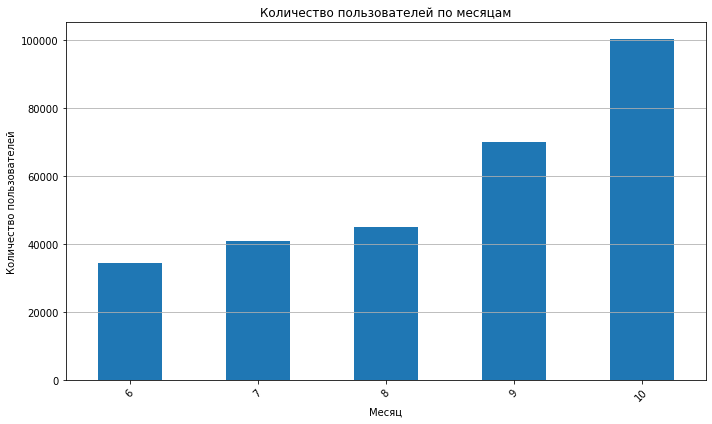

In [44]:
# Группируем по месяцу и считаем количество заказов
season_month = df.groupby('month')['order_id'].count()

# Выводим результат
print(season_month)

# Строим график
plt.figure(figsize=(10, 6))
season_month.plot(kind='bar')
plt.title('Количество пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Показываем график
plt.tight_layout()
plt.show()

<font color='#777778'>Диаграмма показала, что фиксируется увеличение заказов от июня к ноябрю 2024 года.

In [45]:
# Группируем данные по типу мероприятия и считаем количество заказов
event_counts = df.groupby('event_type_description')['order_id'].count()

# Вычисляем долю для каждого типа мероприятия
total_orders = event_counts.sum()
event_shares = event_counts / total_orders * 100

# Сортируем доли по убыванию
event_shares_sorted = event_shares.sort_values(ascending=False)

# Выводим результат
print(event_shares_sorted)


event_type_description
концерт                  38.56
событие                  20.17
спектакль                17.41
шоу                       4.69
спорт                     4.42
мюзикл                    3.41
спортивное мероприятие    3.12
балет                     2.06
выставка                  2.02
цирковое шоу              1.83
фестиваль                 1.47
опера                     0.45
ёлка                      0.33
музыкальный спектакль     0.05
кукольный спектакль       0.00
экскурсия                 0.00
оперетта                  0.00
подарок                   0.00
снегурочка                0.00
рок-мюзикл                0.00
Name: order_id, dtype: float64


<font color='#777778'>в общем за период наблюдения большей популярностью пользуются концерты(39% от общего число). Далее 20 % - события,  17 % спектакли. Остальные мероприятия маловосстребованы.

In [46]:
# Группируем данные по типу мероприятия и сезону
season_event_counts = df[df['season'].isin([
    'лето', 'осень'])].groupby([
    'event_type_description', 'season'])['order_id'].count().unstack(fill_value=0)

# Сортируем по убыванию общего количества заказов (лето + осень)
season_event_counts['total'] = season_event_counts.sum(axis=1)
season_event_counts = season_event_counts.sort_values(by='total', ascending=False).drop(columns='total')

# Выводим результат
print(season_event_counts)

season                   лето  осень
event_type_description              
концерт                 48260  63789
событие                 29593  29012
спектакль               17118  33474
шоу                      6110   7516
спорт                    1547  11290
мюзикл                   4400   5519
спортивное мероприятие   1466   7608
балет                    2372   3626
выставка                 2445   3431
цирковое шоу             2677   2650
фестиваль                3833    440
опера                     467    847
ёлка                       81    864
музыкальный спектакль      53     87
кукольный спектакль         0     13
экскурсия                   5      3
оперетта                    7      0
подарок                     0      4
снегурочка                  1      2
рок-мюзикл                  1      0


season                  лето  осень
event_type_description             
концерт                 0.40   0.37
событие                 0.25   0.17
спектакль               0.14   0.20
шоу                     0.05   0.04
мюзикл                  0.04   0.03
фестиваль               0.03   0.00
балет                   0.02   0.02
цирковое шоу            0.02   0.02
выставка                0.02   0.02
спортивное мероприятие  0.01   0.04
спорт                   0.01   0.07
экскурсия               0.00   0.00
снегурочка              0.00   0.00
рок-мюзикл              0.00   0.00
подарок                 0.00   0.00
оперетта                0.00   0.00
опера                   0.00   0.00
музыкальный спектакль   0.00   0.00
кукольный спектакль     0.00   0.00
ёлка                    0.00   0.01


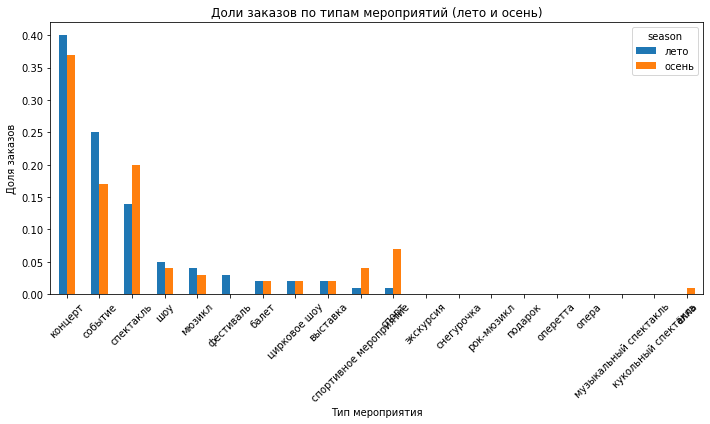

In [47]:
# Группируем данные по типу мероприятия и сезону
season_event_counts = df[df['season'].isin(['лето', 'осень'])].groupby(['event_type_description', 'season'])['order_id'].count().unstack(fill_value=0)

# Рассчитываем общее количество заказов по сезонам
total_orders_per_season = season_event_counts.sum(axis=0)

# Рассчитываем доли
season_event_shares = season_event_counts.div(total_orders_per_season, axis=1)

# Округляем до двух знаков после запятой
season_event_shares = season_event_shares.round(2)

# Сортируем по убыванию по столбцу 'лето'
season_event_shares_sorted = season_event_shares.sort_values(by='лето', ascending=False)

# Выводим результат
print(season_event_shares_sorted)

# Строим столбчатую диаграмму для долей заказов по типам мероприятий с разделением на лето и осень
season_event_shares_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Доли заказов по типам мероприятий (лето и осень)')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов')
plt.xticks(rotation=45)  

# Показываем график
plt.tight_layout()
plt.show()


<font color='#777778'>Вне зависимости  от сезона большей популярностью пользуются концерты. Однако, осень большее число людей предпочли посещение данного типа мероприятий, чем летом. Летом доля концертов составила 40% от общего числа проведенных мероприятий летом, осенью 37 соответственно. <br>
На втором месте по популярности осень находится - спектакль (20%), а летом люди в большей степени предпочли событие (25%). 
На третьем месте наоборот осень выходит событие (17%), а летом спектакль (14%).<br>
  
На четвертом месте осень с удовольствием посетили спорт и цирковое шоу. Летом малое количество людей ходили на спорт, но в равном количестве с осенью посетили цирковое шоу.

In [48]:
# Группируем данные по типу мероприятия и считаем количество заказов
device_type_order_id = df.groupby('device_type_canonical')['order_id'].count()

# Вычисляем долю для каждого типа мероприятия
total_device_type_order_id = device_type_order_id.sum()
device_type_order_id_shares = device_type_order_id / total_device_type_order_id * 100

# Сортируем доли по убыванию
device_type_order_id_sorted = round(device_type_order_id_shares.sort_values(ascending=False), 2)

# Выводим результат
print(device_type_order_id_sorted)

device_type_canonical
mobile    80.00
desktop   20.00
Name: order_id, dtype: float64


<font color='#777778'>При детальном анализе вне зависимости от сезоности предпочтения типу устройства сохраняется: 80 процентов люди предпочитают осуществлять заказы билетов через мобильные устройства и только 20 роцентов через desktop.

In [49]:
# Группируем данные по типу устройства и сезону
season_device_type_counts = df.groupby([
    'device_type_canonical', 'season'])['order_id'].count().unstack(fill_value=0)

# Выводим результат
print(season_device_type_counts)

# Вычисляем долю для каждого типа устройств
total_device_type = season_device_type_counts.sum()
device_type_shares = season_device_type_counts / total_device_type * 100

# Выводим результат
print(device_type_shares)

season                  лето   осень
device_type_canonical               
desktop                23434   34687
mobile                 97002  135488
season                 лето  осень
device_type_canonical             
desktop               19.46  20.38
mobile                80.54  79.62


<font color='#777778'>Вне зависимости от сезоности предпочтения типу устройства сохраняется: 80 процентов люди предпочитают осуществлять заказы билетов через мобильные устройства и только 20 роцентов через desktop.

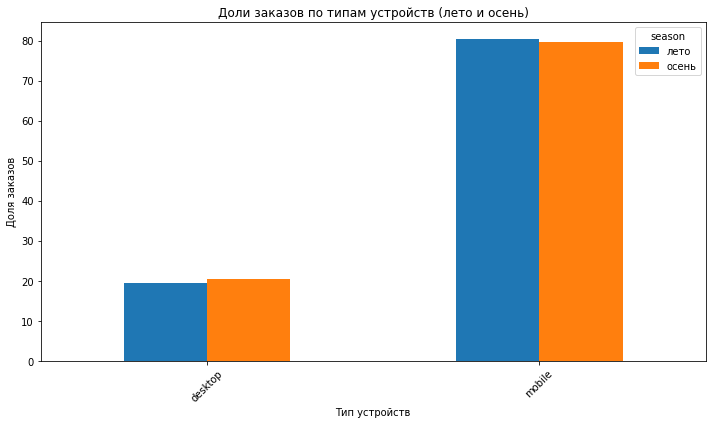

In [50]:
# Строим столбчатую диаграмму для долей заказов по типам мероприятий с разделением на лето и осень
device_type_shares.plot(kind='bar', figsize=(10, 6))
plt.title('Доли заказов по типам устройств (лето и осень)')
plt.xlabel('Тип устройств')
plt.ylabel('Доля заказов')
plt.xticks(rotation=45)  

# Показываем график
plt.tight_layout()
plt.show()

<font color='#777778'>Визуализация доказала, что вне зависимости от сезоности предпочтения типу устройства сохраняется: 80 процентов люди предпочитают осуществлять заказы билетов через мобильные устройства и только 20 роцентов через desktop.

In [51]:
# Вычисляем доли для категории мероприятия по возрастному рейтингу
age_counts = df.groupby('age_limit')['order_id'].count()

# Выводим результат
print("Количество заказов по возрастному рейтингу:")
print(age_counts)

# Общее количество заказов
total_age_limit = age_counts.sum()

# Вычисляем доли для категории мероприятия по возрастному рейтингу
age_shares = (age_counts / total_age_limit) * 100

# Выводим результат
print("Доли заказов по возрастному рейтингу:")
print(age_shares.round(2))

Количество заказов по возрастному рейтингу:
age_limit
0     61487
6     52161
12    62474
16    78556
18    35933
Name: order_id, dtype: int64
Доли заказов по возрастному рейтингу:
age_limit
0    21.16
6    17.95
12   21.50
16   27.03
18   12.36
Name: order_id, dtype: float64


<font color='#777778'>самыми популярными мероприятими осенью стали с возрастным рейтингом от 16 лет - 23%. В меньшей степени от 0 и от 12 лет (23 и 22 %), далее популярность от 6 лет - 18%, самая маленьках от 18  лет - 11 %.
    Летом предпочтение больше отдали также категория от 16 лет - 28%, в меньшей степени от 12 лет - 21%, далее от 6-ти - 18%, от 0 - 17%, и самамя маленьая категория от 18-ти лет - 15%.Самыми востребованными являются в целом 16+, на втором месте от 0 и 12+, на третьем месте 6+. На последнем месте 18+

In [52]:
# Вычисляем доли для категории мероприятия по возрастному рейтингу
age_limit_counts = df.groupby([
    'age_limit', 'season'])['order_id'].count().unstack(fill_value=0)

# Выводим результат
print(age_limit_counts)

total_age_limit = age_limit_counts.sum()
age_limit_shares = age_limit_counts / total_age_limit * 100

# Выводим результат
print(age_limit_shares)

season      лето  осень
age_limit              
0          21615  39872
6          21966  30195
12         24807  37667
16         34012  44544
18         18036  17897
season     лето  осень
age_limit             
0         17.95  23.43
6         18.24  17.74
12        20.60  22.13
16        28.24  26.18
18        14.98  10.52


<font color='#777778'>самыми популярными мероприятими осенью стали с возрастным рейтингом от 16 лет - 23%. В меньшей степени от 0 и от 12 лет (23 и 22 %), далее популярность от 6 лет - 18%, самая маленьках от 18  лет - 11 %.
    Летом предпочтение больше отдали также категория от 16 лет - 28%, в меньшей степени от 12 лет - 21%, далее от 6-ти - 18%, от 0 - 17%, и самамя маленьая категория от 18-ти лет - 15%.

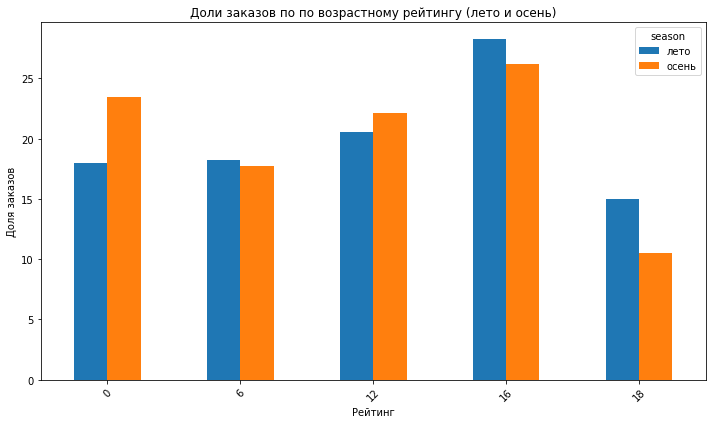

In [53]:
# Строим столбчатую диаграмму для долей заказов по по возрастному рейтингу с разделением на лето и осень
age_limit_shares.plot(kind='bar', figsize=(10, 6))
plt.title('Доли заказов по по возрастному рейтингу (лето и осень)')
plt.xlabel('Рейтинг')
plt.ylabel('Доля заказов')
plt.xticks(rotation=45)  

# Показываем график
plt.tight_layout()
plt.show()

<font color='#777778'>самыми популярными мероприятими осенью стали с возрастным рейтингом от 16 лет - 23%. В меньшей степени от 0 и от 12 лет (23 и 22 %), далее популярность от 6 лет - 18%, самая маленьках от 18  лет - 11 %.
    Летом предпочтение больше отдали также категория от 16 лет - 28%, в меньшей степени от 12 лет - 21%, далее от 6-ти - 18%, от 0 - 17%, и самамя маленьая категория от 18-ти лет - 15%.Визуализация наглядно показала, что самыми востребованными являяется категория 16+, причем,летом больший процент людей посетили мероприятия данного рейтинга. 

In [54]:
# Группируем данные по типу мероприятия и возрастному рейтингу
age_limit_count_sorted = df.groupby(['event_type_main', 'age_limit']).size().unstack(fill_value=0)

# Вычисляем долю общего количества заказов по сезонам
total_event_type_season_dola = age_limit_count_sorted.sum(axis=0)  

# Вычисляем доли для каждого типа мероприятия по сезонам
event_type_shares_season = age_limit_count_sorted.div(total_event_type_season_dola) * 100

# Выводим результат
print("Доли заказов по типам мероприятий и возрастным рейтингам по сезонам:")
print(event_type_shares_season.round(2))

Доли заказов по типам мероприятий и возрастным рейтингам по сезонам:
age_limit          0     6     12    16    18
event_type_main                              
выставки         2.94  1.84  1.54  1.12  0.66
другое          46.40 22.89 18.57 10.34 15.80
концерты         9.37 52.68 40.13 58.50 30.65
спорт           31.10  1.79  2.24  0.08  1.10
стендап          0.00  0.01  0.08  0.57 35.88
театр            7.85 19.83 37.37 29.40 15.90
ёлки             2.33  0.97  0.08  0.00  0.00


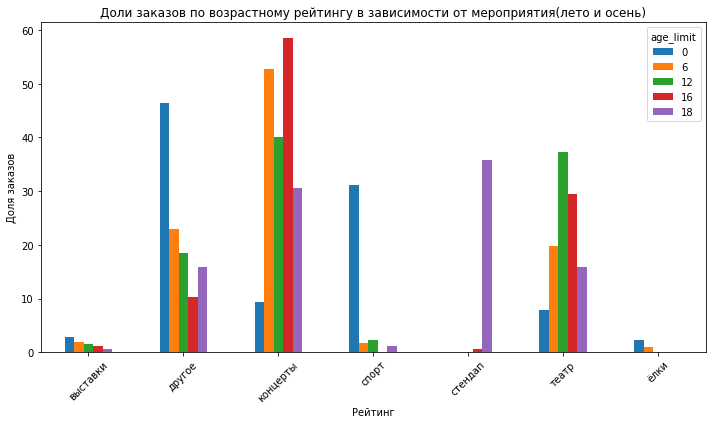

In [55]:
# Строим столбчатую диаграмму для долей заказов по по возрастному рейтингу с разделением на лето и осень
event_type_shares_season.plot(kind='bar', figsize=(10, 6))
plt.title('Доли заказов по возрастному рейтингу в зависимости от мероприятия(лето и осень)')
plt.xlabel('Рейтинг')
plt.ylabel('Доля заказов')
plt.xticks(rotation=45)  

# Показываем график
plt.tight_layout()
plt.show()

<font color='#777778'> Больше всего выставки посетили в возрастном рецтинге 0+, Другое - лидирующую позицию занимает рейтинг (46%), концерты самыми популярными были в возрастной категории 16+ (59%), спорт предпочтение отдали 0+ (31%), стендап выбивается 18+ (35%), театр 12+ (37%), елки 0+ (2%)
    
Рейтинг от 0 самыми востребоваными являются другое, и чуть меньше спорт.
Рейтинг от 6 самыми востребоваными являются концерты, на втором месте театр.
Рейтинг от 12 самыми востребоваными являются концерт. на втором месте театр. Практически на одном уровне.
Рейтинг от 16 самыми востребоваными являются концерты - доминируют над всеми другими категориями. на втором месте театр.
Рейтинг от 18 самыми востребоваными являются стендап, на втором месте концерты. 


Изучиние изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью

In [56]:
#рассчитаем выручка с продажи одного билета 
avg_revenue_tickets = df['revenue_rub'].sum()/df['tickets_count'].sum()

# Выводим результат
print(f'Средняя выручка с одного билета: {avg_revenue_tickets:.2f} рублей')

# Группируем данные по сезону и рассчитываем среднюю выручку с одного билета
avg_revenue_by_season = df.groupby('season').apply(
    lambda x: x['revenue_rub'].sum() / x['tickets_count'].sum()
).reset_index(name='avg_revenue_tickets')

# Выводим результат
print(avg_revenue_by_season)

Средняя выручка с одного билета: 195.50 рублей
  season  avg_revenue_tickets
0   лето               206.24
1  осень               187.93


Средняя выручка с одного билета: составила 195.50 рублей. Летом средняя выручка - 206 рублей несколько больше, чем осенью - 188 рублей. 

In [57]:
#расчитаем выручка с продажи одного билета по типу мероприятия и сезону
avg_revenue = df.groupby([
    'event_type_main', 'season'])['revenue_rub'].mean().reset_index()

# Выводим результат
display(avg_revenue)

,event_type_main,season,revenue_rub
0,выставки,лето,228.31
1,выставки,осень,237.39
2,другое,лето,246.76
3,другое,осень,235.44
4,концерты,лето,816.17
5,концерты,осень,767.98
6,спорт,лето,156.98
7,спорт,осень,159.91
8,стендап,лето,683.47
9,стендап,осень,737.10


<font color='#777778'> значимой разницы в средней выручки за мероприятие в завиимости от сезона нет. Однако, основная доля средней выручки отмечается от елки, концерты, стендап. Однако, на такие мепроятия, как другое, концерты, теарт, елкт летом цена выше, чем осенью. А осенью цена выше на спорт, стендап. 

  event_type_main season  avg_revenue_per_ticket
0        выставки   лето                   89.37
1        выставки  осень                   92.79
2          другое   лето                   87.11
3          другое  осень                   82.93
4        концерты   лето                  289.10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_type_main         14 non-null     object 
 1   season                  14 non-null     object 
 2   avg_revenue_per_ticket  14 non-null     float64
dtypes: float64(1), object(2)
memory usage: 464.0+ bytes
None


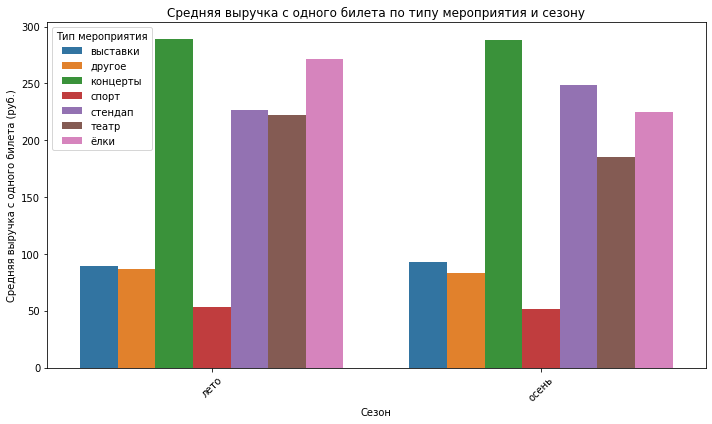

In [58]:
# Рассчитываем среднюю выручку с продажи одного билета по типу мероприятия и сезону
avg_revenue = df.groupby(['event_type_main', 'season']).apply(
    lambda x: x['revenue_rub'].sum() / x['tickets_count'].sum()
).reset_index(name='avg_revenue_per_ticket')

# Проверяем структуру avg_revenue
print(avg_revenue.head())  
print(avg_revenue.info())

# Визуализация с использованием seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue,
             x='season',
             y='avg_revenue_per_ticket',
             hue='event_type_main')

plt.title('Средняя выручка с одного билета по типу мероприятия и сезону')
plt.xlabel('Сезон')
plt.ylabel('Средняя выручка с одного билета (руб.)')
plt.xticks(rotation=45)
plt.legend(title='Тип мероприятия')
plt.tight_layout()
plt.show()

<font color='#777778'>визуализация наглядно показывает,что лидирующие позиции за концертами вне зависимости от сезона. На втором месте средняя стоимость одного билета летом - елки, осенью - выставки. На третьем месте летом - стендап, осенью елки. Далее и летом и зимой театр.
как следует, меняется средняя стоимость билета в зависимости от сезона на елки и выствки.

In [59]:
# Фильтруем только лето и осень
avg_revenue_filtered = avg_revenue[avg_revenue['season'].isin(['лето', 'осень'])]

# Пивотируем данные для удобства анализа
avg_revenue_pivot = avg_revenue_filtered.pivot(index='event_type_main', columns='season', values='avg_revenue_per_ticket')

# Рассчитываем относительную разницу между осенью и летом
avg_revenue_pivot['relative_difference'] = ((avg_revenue_pivot['осень'] - avg_revenue_pivot['лето']) / avg_revenue_pivot['лето']) * 100

# Выводим результаты
print("Средняя выручка с продажи билета по типу мероприятия:")
print(avg_revenue_pivot)

Средняя выручка с продажи билета по типу мероприятия:
season            лето  осень  relative_difference
event_type_main                                   
выставки         89.37  92.79                 3.83
другое           87.11  82.93                -4.80
концерты        289.10 288.45                -0.23
спорт            53.29  51.25                -3.83
стендап         226.44 248.20                 9.61
театр           221.99 185.53               -16.43
ёлки            271.13 225.23               -16.93


In [60]:
# Рассчитываем общее количество заказов и среднюю стоимость билета по типу мероприятия и сезону
summary = df.groupby(['event_type_main', 'season']).agg(
    total_orders=('tickets_count', 'sum'),
    avg_ticket_price=('revenue_rub', lambda x: x.sum() / df.loc[x.index]['tickets_count'].sum())
).reset_index()

# Выводим результаты
print("Распределение заказов и средняя стоимость билета:")
print(summary)

# Сравниваем данные для лета и осени
comparison = summary.pivot(index='event_type_main', columns='season', values=['total_orders', 'avg_ticket_price'])

# Рассчитываем изменения
comparison['orders_change'] = comparison['total_orders']['осень'] - comparison['total_orders']['лето']
comparison['avg_price_change'] = comparison['avg_ticket_price']['осень'] - comparison['avg_ticket_price']['лето']

# Выводим результаты сравнения
print("\nСравнение изменений между летом и осенью:")
print(comparison)

Распределение заказов и средняя стоимость билета:
   event_type_main season  total_orders  avg_ticket_price
0         выставки   лето          6175             89.37
1         выставки  осень          6235             92.79
2           другое   лето         90958             87.11
3           другое  осень         91470             82.93
4         концерты   лето        137480            289.10
5         концерты  осень        168703            288.45
6            спорт   лето          8764             53.29
7            спорт  осень         58135             51.25
8          стендап   лето         19311            226.44
9          стендап  осень         20765            248.20
10           театр   лето         67302            221.99
11           театр  осень        118482            185.53
12            ёлки   лето           850            271.13
13            ёлки  осень          5803            225.23

Сравнение изменений между летом и осенью:
                total_orders         

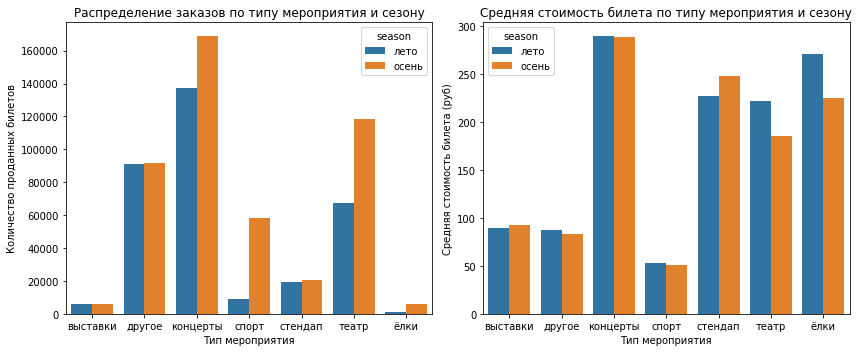

In [61]:
# Визуализация распределения заказов
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=summary, x='event_type_main', y='total_orders', hue='season')
plt.title('Распределение заказов по типу мероприятия и сезону')
plt.ylabel('Количество проданных билетов')
plt.xlabel('Тип мероприятия')

# Визуализация средней стоимости билета
plt.subplot(1,2,2)
sns.barplot(data=summary, x='event_type_main', y='avg_ticket_price', hue='season')
plt.title('Средняя стоимость билета по типу мероприятия и сезону')
plt.ylabel('Средняя стоимость билета (руб)')
plt.xlabel('Тип мероприятия')

plt.tight_layout()
plt.show()

распределение заказов в каждой категории с наступлением осени меняется. Осенью отмечается рост числа закзаов по всем типам мероприятий. Только в категории другое динамика не отслеживается. Популярность осталась на одном уровне.
При этом, средней стоимости одного билета в разрезе разных типов мероприятий значимо не изменилась,, кроме двух типов мероприятий: елки и театр летом средняя стоимость выросла, а стендап наоборот летом цена была ниже, чем осенью

Осенняя активность пользователей

In [62]:
# Фильтрация данных для осени
df_osen_data = df[df['season'].isin(['осень'])]

# Проверка  после фильтрации
print(df_osen_data)

        order_id          user_id created_dt_msk       created_ts_msk  \
14       4222372  0beb8fc0c0a9ce1     2024-10-21  2024-10-21 14:14:26   
15       5244622  0e6fa925c5f346f     2024-09-11  2024-09-11 13:34:03   
16       5244651  0e6fa925c5f346f     2024-09-11  2024-09-11 13:35:58   
19       4173884  1a7e020ee0b4418     2024-10-11  2024-10-11 18:14:13   
21       6074399  26068df7451bdb0     2024-10-23  2024-10-23 13:46:01   
...          ...              ...            ...                  ...   
290605   5718946  ff684621b134cc4     2024-10-03  2024-10-03 12:01:53   
290606   7375078  ff684621b134cc4     2024-10-06  2024-10-06 12:32:09   
290607    343390  ff684621b134cc4     2024-10-31  2024-10-31 12:27:42   
290608   7378935  ff6bf53a0207b52     2024-10-02  2024-10-02 20:58:31   
290610   2938020  ffdfac9273f943b     2024-10-22  2024-10-22 09:30:54   

        event_id cinema_circuit  age_limit currency_code  \
14        169230            нет         16           rub   
15 

In [63]:
# Рассчитаем среднее число заказов на одного пользователя
avg_user_order = df_osen_data['order_id'].count() / df_osen_data['user_id'].nunique()

# Рассчитываем среднюю стоимость одного билета
avg_ticket_price = df_osen_data['revenue_rub'].sum() / df_osen_data['tickets_count'].sum()

# Создание сводной таблицы
pivot_table = df_osen_data.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'count'),
    DAU=('user_id', 'nunique'),
    avg_user_order=('user_id', lambda x: x.count() / x.nunique()),  # Пересчитываем для каждой группы
    avg_ticket_price=('revenue_rub', lambda x: x.sum() / df_osen_data.loc[x.index, 'tickets_count'].sum())  # Пересчитываем для каждой группы
).reset_index()

# Округляем нужные столбцы до 2 знаков после запятой
pivot_table['avg_user_order'] = pivot_table['avg_user_order'].round(2)
pivot_table['avg_ticket_price'] = pivot_table['avg_ticket_price'].round(2)

# Переименование столбцов
pivot_table.rename(columns={
    'created_dt_msk': 'дата',
    'total_orders': 'число заказов',
    'DAU': 'DAU',
    'avg_user_order': 'среднее число заказов на одного пользователя',
    'avg_ticket_price': 'средняя стоимость одного билета'
}, inplace=True)

# Выводим сводную таблицу
display(pivot_table)

,дата,число заказов,DAU,среднее число заказов на одного пользователя,средняя стоимость одного билета
0,2024-09-01,1348,569,2.37,206.66
1,2024-09-02,1391,580,2.40,193.94
2,2024-09-03,5124,783,6.54,76.83
3,2024-09-04,1784,688,2.59,183.32
4,2024-09-05,1960,745,2.63,193.09
...,...,...,...,...,...
56,2024-10-27,2866,1039,2.76,190.56
57,2024-10-28,2860,988,2.89,178.47
58,2024-10-29,2889,1005,2.87,184.51
59,2024-10-30,2960,1049,2.82,188.61


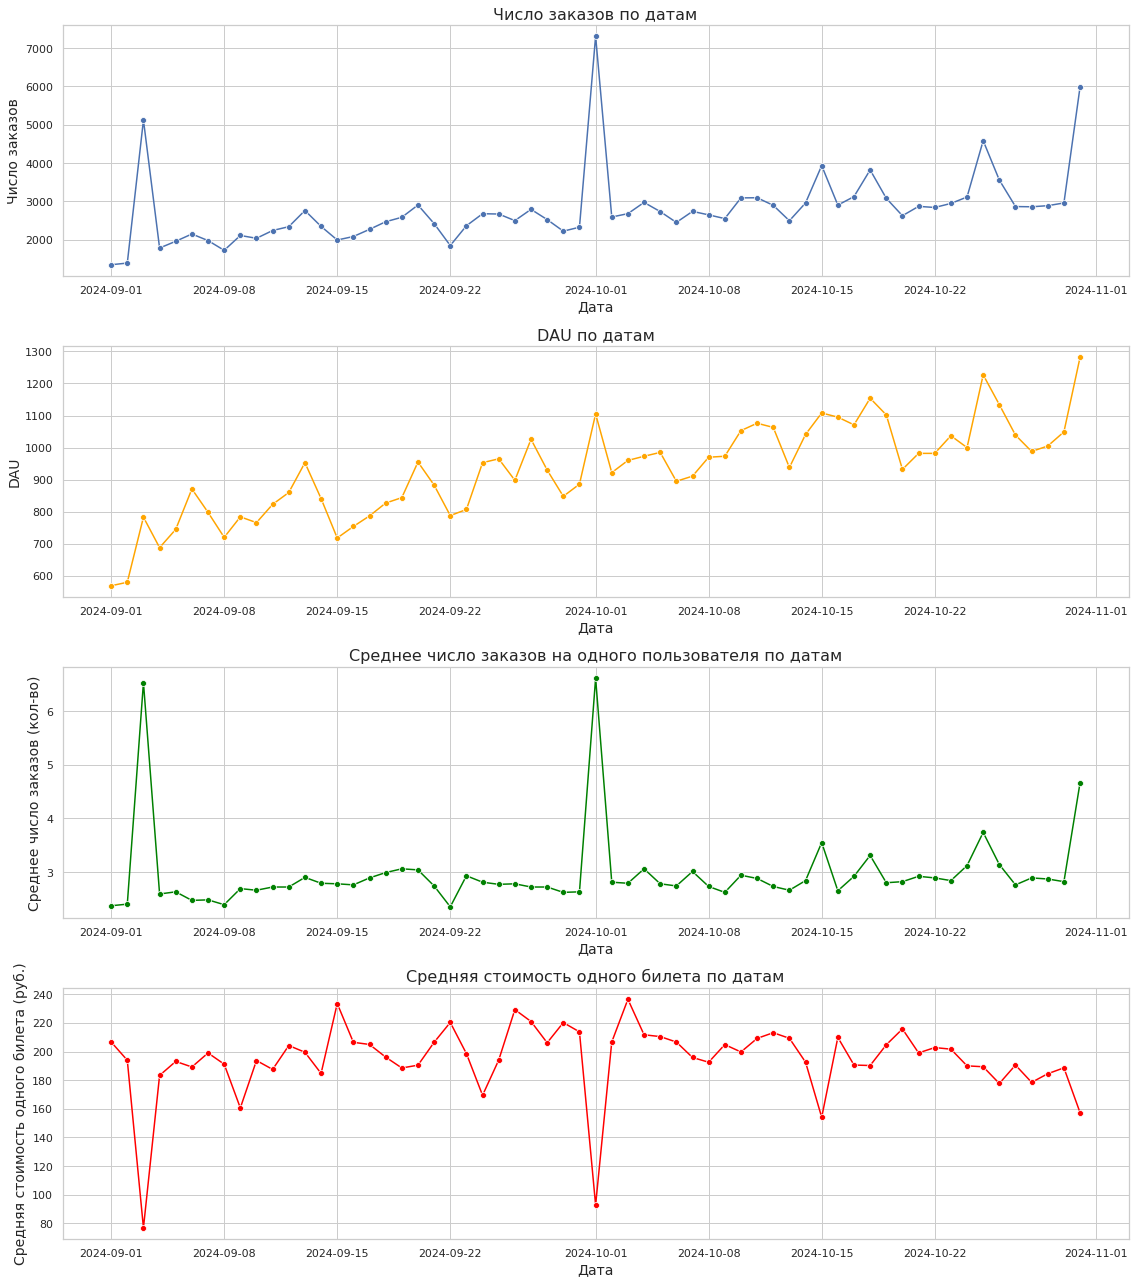

In [64]:
# Устанавливаем стиль графиков
sns.set(style='whitegrid')

# Создаем фигуру и оси для графиков (изменено на nrows=4)
fig, axes = plt.subplots(
    nrows=4, 
    ncols=1, 
    figsize=(16, 18))

# График числа заказов
sns.lineplot(
    data=pivot_table, 
    x='дата', 
    y='число заказов', 
    ax=axes[0], 
    marker='o')
axes[0].set_title('Число заказов по датам', fontsize=16)
axes[0].set_xlabel('Дата', fontsize=14)
axes[0].set_ylabel('Число заказов', fontsize=14)

# График DAU
sns.lineplot(
    data=pivot_table, 
    x='дата', 
    y='DAU', 
    ax=axes[1], 
    color='orange', 
    marker='o')
axes[1].set_title('DAU по датам', fontsize=16)
axes[1].set_xlabel('Дата', fontsize=14)
axes[1].set_ylabel('DAU', fontsize=14)

# График среднее число заказов на одного пользователя
sns.lineplot(
    data=pivot_table, 
    x='дата', 
    y='среднее число заказов на одного пользователя', 
    ax=axes[2], 
    color='green', 
    marker='o')
axes[2].set_title('Среднее число заказов на одного пользователя по датам', fontsize=16)
axes[2].set_xlabel('Дата', fontsize=14)
axes[2].set_ylabel('Среднее число заказов (кол-во)', fontsize=14)

# График средняя стоимость одного билета (добавлен как четвертый график)
sns.lineplot(
    data=pivot_table, 
    x='дата', 
    y='средняя стоимость одного билета', 
    ax=axes[3],  # Теперь это корректно
    color='red', 
    marker='o')
axes[3].set_title('Средняя стоимость одного билета по датам', fontsize=16)
axes[3].set_xlabel('Дата', fontsize=14)
axes[3].set_ylabel('Средняя стоимость одного билета (руб.)', fontsize=14) 
    
# Автоматическая настройка подложки
plt.tight_layout()
plt.show()

<font color='#777778'>Анализ осенней активности пользователей показал, рост активных пользователей от сентября к ноября. Рост неравномерный, имеются пикообразное течение, но в положительной прогрессии.  25 октября скачек числа активных пользователей, но с 26.10 по 27, 28, 29 падение активности. И 31.10 DAU достигает максимальное значение (1282). На 01.09.2024 DAU составляло 569.
В общем количества активных покупателей в октябре в целом больше, чем в сентябре.
При этом, число совершенных заказом относительно стабильное. 
Обращает внимание три пика - 03.09.2024. В эту даты резкое падение стоимости билета (77 рублей) влечет ростов числа заказов и среднего числа купленных билетов один пользователем (6,5 билетов при среднем 2,5-2,6). Так же хочется отметить, что данная акция привлекла новыз покупателей. Если 02.09. DAU составляет 580 чел., то 03.09. 783. Несмотря на то, что 04.09 виден незначительный спад, DAU вырос и не падол больше до уровня 01.09.

Второй пик - 10.09.2024. ЧИсло заказов достигло максимума. В этот день также отмечается падение средней стоимости билета, рост числа купленных билетов одним пользователем.
Третий пик - 31.10.2024. Он менее значимый, чем предыдущие. Причина роста обьясняется теми же параметрами.
Среднее число купленных билетов одним покупателем в общем стабильно. В среднем, 2,5 билета покупает один покупатель. Пик данного покупателя наблюдается в период падения средней стоимости билетов. И достигает более 6 билетов в одни руки.

In [65]:
# Создаем df_osen_data как копию 
df_osen_data = df_osen_data.copy()

# Создаем новый столбец 'day_of_week', выделяя день недели
df_osen_data['day_of_week'] = df_osen_data['created_dt_msk'].dt.day_name()

# Выводим результат
print(df_osen_data)

        order_id          user_id created_dt_msk       created_ts_msk  \
14       4222372  0beb8fc0c0a9ce1     2024-10-21  2024-10-21 14:14:26   
15       5244622  0e6fa925c5f346f     2024-09-11  2024-09-11 13:34:03   
16       5244651  0e6fa925c5f346f     2024-09-11  2024-09-11 13:35:58   
19       4173884  1a7e020ee0b4418     2024-10-11  2024-10-11 18:14:13   
21       6074399  26068df7451bdb0     2024-10-23  2024-10-23 13:46:01   
...          ...              ...            ...                  ...   
290605   5718946  ff684621b134cc4     2024-10-03  2024-10-03 12:01:53   
290606   7375078  ff684621b134cc4     2024-10-06  2024-10-06 12:32:09   
290607    343390  ff684621b134cc4     2024-10-31  2024-10-31 12:27:42   
290608   7378935  ff6bf53a0207b52     2024-10-02  2024-10-02 20:58:31   
290610   2938020  ffdfac9273f943b     2024-10-22  2024-10-22 09:30:54   

        event_id cinema_circuit  age_limit currency_code  \
14        169230            нет         16           rub   
15 

In [66]:
#Рассчитаем среднее число заказов на одного пользователя
avg_user_order = df_osen_data['order_id'].count() / df_osen_data['user_id'].nunique()

# Рассчитываем среднюю стоимость одного билета
avg_ticket_price = df_osen_data['revenue_rub'].sum() / df_osen_data['tickets_count'].sum()

# Создание сводной таблицы
pivot_table = df_osen_data.groupby('day_of_week').agg(
    total_orders=('order_id', 'count'),
    DAU=('user_id', 'nunique'),
    avg_user_order=('user_id', lambda x: x.count() / x.nunique()),  # Пересчитываем для каждой группы
    avg_ticket_price=('revenue_rub', lambda x: x.sum() / df_osen_data.loc[x.index, 'tickets_count'].sum())  # Пересчитываем для каждой группы
).reset_index()

# Округляем нужные столбцы до 2 знаков после запятой
pivot_table['avg_user_order'] = pivot_table['avg_user_order'].round(2)
pivot_table['avg_ticket_price'] = pivot_table['avg_ticket_price'].round(2)

# Переименование столбцов
pivot_table.rename(columns={
    'day_of_week': 'день недели',
    'total_orders': 'число заказов',
    'DAU': 'DAU',
    'avg_user_order': 'среднее число заказов на одного пользователя',
    'avg_ticket_price': 'средняя стоимость одного билета'
}, inplace=True)

# Выводим сводную таблицу
display(pivot_table)

,день недели,число заказов,DAU,среднее число заказов на одного пользователя,средняя стоимость одного билета
0,Friday,25089,4898,5.12,199.29
1,Monday,21709,4474,4.85,193.05
2,Saturday,21545,4598,4.69,199.82
3,Sunday,19579,4415,4.43,209.99
4,Thursday,27392,4998,5.48,193.84
5,Tuesday,31739,4817,6.59,143.30
6,Wednesday,23122,4851,4.77,197.71


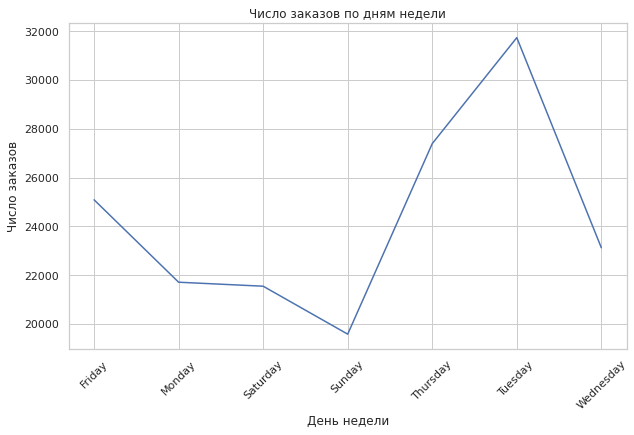

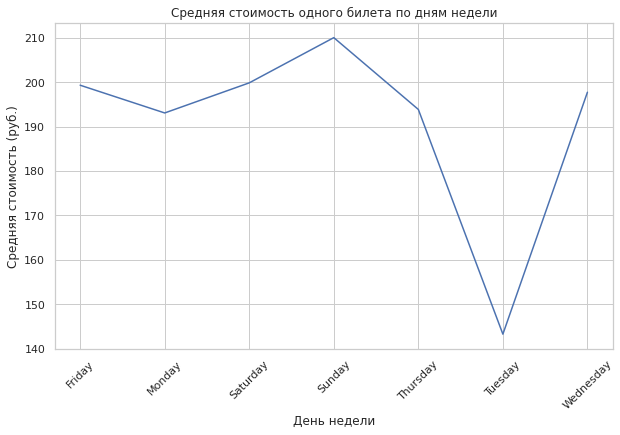

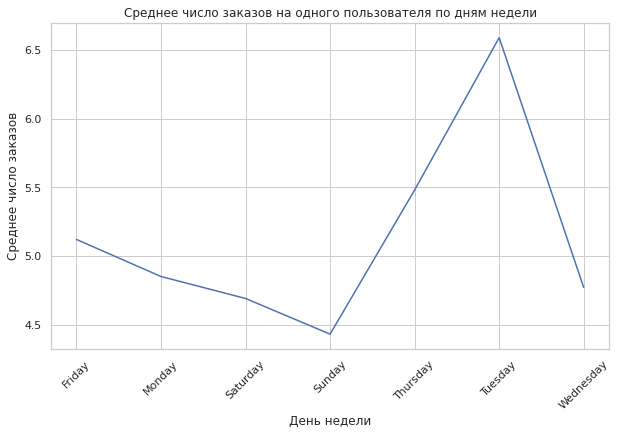

In [67]:
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Создаем гистограмму числа заказов по дням недели
plt.figure(figsize=(10, 6))
sns.lineplot(x='день недели', y='число заказов', data=pivot_table, palette='viridis')
plt.title('Число заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.show()

# Создаем график средней стоимости билета по дням недели
plt.figure(figsize=(10, 6))
sns.lineplot(x='день недели', y='средняя стоимость одного билета', data=pivot_table, palette='coolwarm')
plt.title('Средняя стоимость одного билета по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость (руб.)')
plt.xticks(rotation=45)
plt.show()

# Создаем график среднего числа заказов на одного пользователя по дням недели
plt.figure(figsize=(10, 6))
sns.lineplot(x='день недели', y='среднее число заказов на одного пользователя', data=pivot_table, palette='magma')
plt.title('Среднее число заказов на одного пользователя по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее число заказов')
plt.xticks(rotation=45)
plt.show()

<font color='#777778'>Анализ недельной активности овенью показал, что в суббота отмечает значимый рост числа совершенных заказов. При этом, люди предпочитают одновременно покупать несколько билетов, что обусловлено снижением стоимости в среднем билета. Возмо, в этот день проводят акцию 4+1,либо акция выходного дня - скидка.
 В четверг меньше всего совершаются заказы, а если и осуществляют бронь, то одновременно покупается меньшее число билетов.


Для осеннего и летнего периодов сравните распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.<br>


В общем за период наблюдения большей популярностью пользуются концерты(39% от общего число). Далее 20 % - события,  17 % спектакли. Остальные мероприятия маловосстребованы.<br>
Вне зависимости  от сезона большей популярностью пользуются концерты. Однако, осень большее число людей предпочли посещение данного типа мероприятий, чем летом. Летом доля концертов составила 40% от общего числа проведенных мероприятий летом, осенью 37 соответственно. <br>
На втором месте по популярности осень находится - спектакль (20%), а летом люди в большей степени предпочли событие (25%). 
На третьем месте наоборот осень выходит событие (17%), а летом спектакль (14%).<br>
  
На четвертом месте осень с удовольствием посетили спорт и цирковое шоу. Летом малое количество людей ходили на спорт, но в равном количестве с осенью посетили цирковое шоу.<br>
Распределение заказов билетов по типу устройства распределяется следующим  образом:  <br>         
desktop 23434 (летом), 34687(осенью)<br>
mobile 97002(летом), 135488(осенью). Таким образом, 80 процентов людей предпочитают осуществлять заказы билетов через мобильные устройства и только 20 роцентов через desktop.<br>
При детальном анализе сезонности выявленная закономерность: летом люди в 80 процентах случаев пользуется мобильным устройством для осуществения бронирования, а 20 процентов пользуются desktop. При детальном анализе вне зависимости от сезоности предпочтения типу устройства сохраняется: 80 процентов люди предпочитают осуществлять заказы билетов через мобильные устройства и только 20 роцентов через desktop. ЧТо наглядно представлено на диаграмме.<br>

самыми популярными мероприятими осенью стали с возрастным рейтингом от 16 лет - 23%.<br> В меньшей степени от 0 и от 12 лет (23 и 22 %), далее популярность от 6 лет - 18%, самая маленьках от 18  лет - 11 %.<br>
 Летом предпочтение больше отдали также категория от 16 лет - 28%, в меньшей степени от 12 лет - 21%, далее от 6-ти - 18%, от 0 - 17%, и самамя маленьая категория от 18-ти лет - 15%.<br>

распределение заказов в каждой категории с наступлением осени меняется. Осенью отмечается рост числа закзаов по всем типам мероприятий. Только в категории другое динамика не отслеживается. <br>
Популярность осталась на одном уровне.
При этом, средней стоимости одного билета в разрезе разных типов мероприятий значимо не изменилась,, кроме двух типов мероприятий: елки и театр летом средняя стоимость выросла, а стендап наоборот летом цена была ниже, чем осенью
Анализ средней выручки на билет показал зависимость от сезонности и типа мероприятия.<br>
СРедняя выручка от одного билета составила 195 руб.Основная доля средней выручки отмечается от елки, концерты, стендап. Однако, на такие мепроятия, как другое, концерты, теарт, елкт летом цена выше, чем осенью. А осенью цена выше на спорт, стендап. 
Визуализация наглядно показывает,что лидирующие позиции за концертами вне зависимости от сезона. На втором месте средняя стоимость одного билета летом - елки, осенью - выставки. На третьем месте летом - стендап, осенью елки. Далее и летом и зимой театр.<br>
как следует, меняется средняя стоимость билета в зависимости от сезона на елки и выставки.<br>
Анализ осенней активности пользователей показал, рост активных пользователей от сентября к ноября. Рост неравномерный, имеются пикообразное течение, но в положительной прогрессии.  25 октября скачек числа активных пользователей, но с 26.10 по 27, 28, 29 падение активности. И 31.10 DAU достигает максимальное значение (1282). На 01.09.2024 DAU составляло 569.<br>
В общем количества активных покупателей в октябре в целом больше, чем в сентябре.<br>
При этом, число совершенных заказом относительно стабильное. <br>
Обращает внимание три пика - 03.09.2024. В эту даты резкое падение стоимости билета (77 рублей) влечет ростов числа заказов и среднего числа купленных билетов один пользователем (6,5 билетов при среднем 2,5-2,6). Так же хочется отметить, что данная акция привлекла новыз покупателей. Если 02.09. DAU составляет 580 чел., то 03.09. 783. Несмотря на то, что 04.09 виден незначительный спад, DAU вырос и не падол больше до уровня 01.09.<br>

Второй пик - 10.09.2024. ЧИсло заказов достигло максимума. В этот день также отмечается падение средней стоимости билета, рост числа купленных билетов одним пользователем.<br>
Третий пик - 31.10.2024. Он менее значимый, чем предыдущие. Причина роста обьясняется теми же параметрами.<br>
Среднее число купленных билетов одним покупателем в общем стабильно. В среднем, 2,5 билета покупает один покупатель. Пик данного покупателя наблюдается в период падения средней стоимости билетов. И достигает более 6 билетов в одни руки.<br>
Анализ недельной активности овенью показал, что в суббота отмечает значимый рост числа совершенных заказов. При этом, люди предпочитают одновременно покупать несколько билетов, что обусловлено снижением стоимости в среднем билета. Возмо, в этот день проводят акцию 4+1,либо акция выходного дня - скидка.<br>
 В четверг меньше всего совершаются заказы, а если и осуществляют бронь, то одновременно покупается меньшее число билетов.

Популярные события и партнёры


In [68]:
# Рассчитаем уникальное количество мероприятий и общее число заказов в зависимости от региона
top_region = df.groupby('region_name').agg(
    total_revenue_rub=('revenue_rub', 'sum'),
    unique_events=('event_id', 'nunique'),  
    total_orders=('order_id', 'count')              
).reset_index()

# Сокращаем значения до 2 знаков после запятой
top_region['total_revenue_rub'] = top_region['total_revenue_rub'].round(2)

# Сортируем по общему доходу в порядке убывания
top_region = top_region.sort_values(by='total_revenue_rub', ascending=False)

# Переименовываем столбцы
top_region = top_region.rename(columns={
    'region_name': 'Регион',
    'total_revenue_rub': 'Общий доход (руб)',
    'unique_events': 'Уникальные мероприятия',
    'total_orders': 'Общее количество заказов'
})

# Рассчитываем общую сумму дохода, уникальных мероприятий и заказов
total_revenue = top_region['Общий доход (руб)'].sum()
total_unique_events = top_region['Уникальные мероприятия'].sum()
total_orders = top_region['Общее количество заказов'].sum()

# Добавляем новые столбцы с долями
top_region['Доля дохода'] = top_region['Общий доход (руб)'] / total_revenue
top_region['Доля уникальных мероприятий'] = top_region['Уникальные мероприятия'] / total_unique_events
top_region['Доля заказов'] = top_region['Общее количество заказов'] / total_orders

# Сокращаем значения долей до 2 знаков после запятой
top_region['Доля дохода'] = top_region['Доля дохода'].round(2)
top_region['Доля уникальных мероприятий'] = top_region['Доля уникальных мероприятий'].round(2)
top_region['Доля заказов'] = top_region['Доля заказов'].round(2)

# Выводим результат
top_region

,Регион,Общий доход (руб),Уникальные мероприятия,Общее количество заказов,Доля дохода,Доля уникальных мероприятий,Доля заказов
23,Каменевский регион,"61,241,434.13",5983,91058,0.39,0.27,0.31
60,Североярская область,"25,338,938.66",3814,44049,0.16,0.17,0.15
45,Озернинский край,"9,769,409.35",349,10476,0.06,0.02,0.04
77,Широковская область,"9,509,246.45",1233,16457,0.06,0.05,0.06
41,Малиновоярский округ,"5,939,848.15",165,6618,0.04,0.01,0.02
...,...,...,...,...,...,...,...
5,Верхозёрский край,"2,180.02",2,11,0.00,0.00,0.00
66,Сосноводолинская область,"1,746.95",2,10,0.00,0.00,0.00
80,Яснопольский округ,"1,155.34",5,21,0.00,0.00,0.00
76,Шанырский регион,0.00,28,2882,0.00,0.00,0.01


<font color='#777778'>  Среди лидеров регионов, которые внесли максимальный вклад в выручку. На первом месте (39% от всей выручке) по выручке - Каменевский регион (выручка составила - 61241434.13 рублей, проведено 59837 (27% от общего числа выручки) уникальных мероприятий, проведено 91058 заказов (17 % от общего числа заказов))<br>
На втором месте (16%) по выручке вышла Североярская область (выручка составила - 25338938.66 рублей, проведено 3814 уникальных мероприятий (17%), проведено 44049 заказов (15%))<br>
На третьем месте (6%) Озернинский край  (выручка составила - 9769409.35 рублей, проведено 349 уникальных мероприятий (2%), проведено 10476 заказов 93%))<br>  
На четвертом месте (6%) Широковская область (выручка составила - 9509246.455 рублей , проведено 1233 уникальных мероприятий (5%), проведено 16457 заказов (6%))<br>  

/tmp/ipykernel_217/1786163969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_7_regions['Общий доход (руб)'] = top_7_regions['Общий доход (руб)'].round(2)


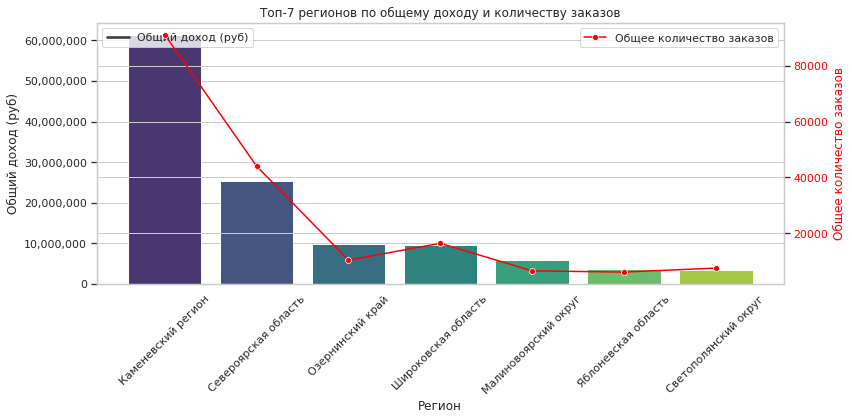

In [69]:
# Отбираем топ-7 регионов по выручке
top_7_regions = top_region.head(7)

top_7_regions['Общий доход (руб)'] = top_7_regions['Общий доход (руб)'].round(2)


# Создаем фигуру и оси
plt.figure(figsize=(12, 6))

# Столбчатая диаграмма общего дохода
ax1 = sns.barplot(x='Регион', y='Общий доход (руб)', data=top_7_regions, palette='viridis')

# Настраиваем оси
plt.title('Топ-7 регионов по общему доходу и количеству заказов')
plt.xticks(rotation=45)
plt.ylabel('Общий доход (руб)')
plt.xlabel('Регион')

# Создаем вторую ось Y для количества заказов
ax2 = ax1.twinx()
sns.lineplot(x='Регион', y='Общее количество заказов', data=top_7_regions, color='red', marker='o', ax=ax2)

# Настраиваем вторую ось Y
ax2.set_ylabel('Общее количество заказов', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Добавляем легенду
ax1.legend(['Общий доход (руб)'], loc='upper left')
ax2.legend(['Общее количество заказов'], loc='upper right')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

<font color='#777778'>В топ-7 регионов вошли Каменевский регион,Североярская область, Озернинский край, Широковская область , Малинвовоярский округ, ЯБлоневская область, Светополянская округ.  <br> 
Визуализация показала, что лидером является Каменевский регион, он значимо доминирует над  другими регионами. <br>
Анализ топ-7 регионов по числу осущественных заказов показал, что распределение регионов аналогично распределению регионов по выручке. Отличается только Широковская область, она вышла на третье место сместив Озернинский район на четвертое место. <br>

# Получаем общее количество мероприятий, количество заказов и выручку 
total_unique_events = df['event_type_main'].nunique()
total_orders_count = df['order_id'].count()
total_revenue = round(df['revenue_rub'].sum(), 2)

НЕ понимаю, та я же total_revenue суммирую. А заказы и мероприятия считаю количество

In [84]:
# Группировка и расчет нужных показателей
service_name = df.groupby('service_name').agg(
    total_revenue_rub=('revenue_rub', 'sum'),     
    unique_events=('event_id', 'nunique'),        
    total_orders=('order_id', 'count')             
).reset_index()

# Округляем доходы до 2-х знаков после запятой
service_name['total_revenue_rub'] = service_name['total_revenue_rub'].round(2)

# Переименование столбцов
service_name = service_name.rename(columns={
    'service_name': 'Билетный оператор',
    'total_revenue_rub': 'Общий доход (руб.)',
    'unique_events': 'Уникальные мероприятия',
    'total_orders': 'Общее количество заказов'
})

# Расчет общих показателей для всей таблицы
total_revenue = service_name['Общий доход (руб.)'].sum()
total_unique_events = service_name['Уникальные мероприятия'].sum()
total_orders = service_name['Общее количество заказов'].sum()

# Доли каждого оператора относительно общих показателей
service_name['Доля дохода (%)'] = (service_name['Общий доход (руб.)'] / total_revenue * 100).round(2)
service_name['Доля уникальных мероприятий (%)'] = (service_name['Уникальные мероприятия'] / total_unique_events * 100).round(2)
service_name['Доля заказов (%)'] = (service_name['Общее количество заказов'] / total_orders * 100).round(2)

# Сортируем таблицу по общему доходу в порядке убывания
service_name = service_name.sort_values(by='Доля дохода (%)', ascending=False)

# Выводим результат
service_name

,Билетный оператор,Общий доход (руб.),Уникальные мероприятия,Общее количество заказов,Доля дохода (%),Доля уникальных мероприятий (%),Доля заказов (%)
3,Билеты без проблем,"26,189,368.69",4255,63519,16.74,17.39,21.86
25,Облачко,"21,644,068.03",2348,26642,13.83,9.60,9.17
24,Мой билет,"19,095,999.89",1308,34839,12.20,5.35,11.99
8,Весь в билетах,"18,049,303.43",867,16849,11.53,3.54,5.80
21,Лови билет!,"17,665,311.36",4882,41124,11.29,19.95,14.15
5,Билеты в руки,"13,385,388.92",3538,40343,8.55,14.46,13.88
19,Край билетов,"6,703,958.74",253,6207,4.28,1.03,2.14
26,Прачечная,"4,900,985.27",1027,10273,3.13,4.20,3.53
13,Дом культуры,"4,676,648.03",274,4502,2.99,1.12,1.55
35,Яблоко,"3,971,152.33",716,5039,2.54,2.93,1.73


<font color='#777778'> В топ наиболее активных партнёрах вошли: Билеты без проблем - вклад от общей выручки составил 17% (доля заказов от числа всех заказов 22%).<br>
На втором месте Облачко - вклад от общей выручки составил 14% (доля заказов от числа всех заказов 9%).<br>
Далее Мой билет- вклад от общей выручки составил 12% (доля заказов от числа всех заказов 12%).<br>
Весь в билетах- вклад от общей выручки составил 12% (доля заказов от числа всех заказов 6%).<br>
Лови билет!- вклад от общей выручки составил 11% (доля заказов от числа всех заказов 14%).<br>

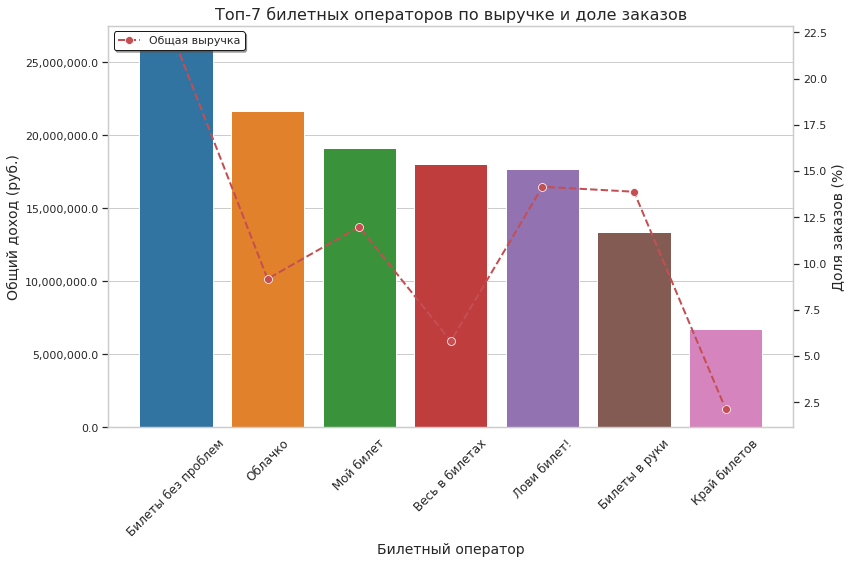

In [72]:
# Выбираем топ-7 операторов по выручке
top_7_services = service_name.nlargest(7, 'Общий доход (руб.)')

# Настраиваем внешний вид графика
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", n_colors=len(top_7_services))  # Яркая цветовая палитра

# Создаем основной график
fig, ax1 = plt.subplots(figsize=(12, 8))

# Столбчатая диаграмма для выручки
bar_plot = sns.barplot(x='Билетный оператор', y='Общий доход (руб.)', data=top_7_services, palette=palette, ax=ax1)
ax1.set_title('Топ-7 билетных операторов по выручке и доле заказов', fontsize=16)
ax1.set_xlabel('Билетный оператор', fontsize=14)
ax1.set_ylabel('Общий доход (руб.)', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=12)

# Формат чисел с разделением тысяч
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,}')
ax1.yaxis.set_major_formatter(formatter)

# Линейная диаграмма для доли заказов
ax2 = ax1.twinx()
line_plot = sns.lineplot(x='Билетный оператор', y='Доля заказов (%)', data=top_7_services, color='r', marker='o', linestyle='--', markersize=8, linewidth=2, ax=ax2)
ax2.set_ylabel('Доля заказов (%)', fontsize=14)
ax2.grid(False)  # Отключаем сетку для второго графика

# Добавляем легенду
legends = ['Общая выручка', 'Доля заказов']
plt.legend(legends, loc='upper left', frameon=True, facecolor='w', edgecolor='k', shadow=True)

# Автоматическое размещение элементов на холсте
plt.tight_layout()

# Показываем график
plt.show()

<font color='#777778'> визуализация и выделение топ-7 билетных операторов показала, что лидерами стали: лидер - Билеты без проблем, далее по уменьшению доли выручки от общей выручки: облачко, мой билет, весь мир в билетах, ливо билет билеты в руках, край билетов.<br>
Однако, по доли заказов данные регионы расоплоагаются иначе.Билеты без проблем остаются лидерами, далее на втором месте - лови билет и билеты в руках. На тртьем месте иой дилет, далее по убыванию - облачко, весь в билетах и край билетов.<br>

В топ-7 регионов вошли Каменевский регион,Североярская область, Озернинский край, Широковская область , Малинвовоярский округ, ЯБлоневская область, Светополянская округ.  <br> 
Визуализация показала, что лидером является Каменевский регион, он значимо доминирует над  другими регионами. <br>
Анализ топ-7 регионов по числу осущественных заказов показал, что распределение регионов аналогично распределению регионов по выручке. Отличается только Широковская область, она вышла на третье место, сместив Озернинский район на четвертое место. <br>
Среди лидеров регионов, которые внесли максимальный вклад в выручку. На первом месте по выручке, а именно 39% от всей выручке по выручке - Каменевский регион (проведено 27% от общего числа проведенных мероприятий, 17 % от общего числа заказов))<br>
На втором месте (16% от общей выручки) по выручке вышла Североярская область (проведено 3814 уникальных мероприятий (17%), выполнено 44049 заказов (15%))<br>
На третьем месте (6% от общей выручки) Озернинский край  (проведено 349 уникальных мероприятий (2%), проведено 10476 заказов 93%))<br>  
На четвертом месте (6% от общей выручки) Широковская область (проведено 1233 уникальных мероприятий (5%), проведено 16457 заказов (6%))<br>  

В топ наиболее активных партнёрах по выручке вошли: Билеты без проблем - вклад от общей выручки составил 17% (доля заказов от числа всех заказов 22%).<br>
На втором месте Облачко - вклад от общей выручки составил 14% (доля заказов от числа всех заказов 9%).<br>
Далее Мой билет- вклад от общей выручки составил 12% (доля заказов от числа всех заказов 12%).<br>
Визуализация и выделение топ-7 билетных операторов показала, что лидерами стали: лидер - Билеты без проблем, далее по уменьшению оли выручки от общей выручки: облачко, мой билет, весь мир в билетах, ливо билет, билеты в руках, край билетов.<br>

Статистический анализ данных

In [73]:
#Разделим пользователей на две группы в зависимости от типа устройств
group_mobile = df_osen_data[df_osen_data['device_type_canonical'] == 'mobile']['user_id'].nunique()
group_device = df_osen_data[df_osen_data['device_type_canonical'] == 'desktop']['user_id'].nunique()
print(f'Количество уникальных пользователей мобильного приложения: {group_mobile}')
print(f'Количество уникальных пользователей стационарных устройств: {group_device}')

Количество уникальных пользователей мобильного приложения: 14239
Количество уникальных пользователей стационарных устройств: 4906


In [74]:
#Находим процент разницы между группами
rasnica_mobile_device = round((group_mobile-group_device)/(group_mobile+group_device)*100, 0)
rasnica_mobile_device

49.0

In [75]:
# Рассчитаем количество заказов на пользователя для каждой группы
mobile_orders = df_osen_data[df_osen_data['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count()
desktop_orders = df_osen_data[df_osen_data['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count()

# Функция для нахождения выбросов по методу IQR
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Находим выбросы для мобильных и десктопных заказов
mobile_outliers = find_outliers(mobile_orders)
desktop_outliers = find_outliers(desktop_orders)

print("\nВыбросы для мобильных заказов:")
print(mobile_outliers.count())

print("\nВыбросы для десктопных заказов:")
print(desktop_outliers.count())


Выбросы для мобильных заказов:
1505

Выбросы для десктопных заказов:
565


разница между выборкой составила 49%. выборки различаются по размеру более чем на 25%, мы в любом случае применяем поправку Уэлча для ttest. Выбросы присутстввуют. 

In [76]:
# Рассчитаем общее количество заказов и уникальных пользователей
total_orders = df_osen_data['order_id'].count()
unique_users = df_osen_data['user_id'].nunique()

# Рассчитаем среднее количество заказов на пользователя
avg_orders_per_user = total_orders / unique_users

# Разделим данные на две группы и рассчитаем количество заказов на пользователя для каждой группы
mobile_orders = df_osen_data[df_osen_data['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count()
desktop_orders = df_osen_data[df_osen_data['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count()

avg_mobile_orders = mobile_orders.mean()
avg_desktop_orders = desktop_orders.mean()

print(f"Среднее количество заказов на пользователя мобильного приложения: {avg_mobile_orders}")
print(f"Среднее количество заказов на пользователя стационарных устройств: {avg_desktop_orders}")

Среднее количество заказов на пользователя мобильного приложения: 9.515274949083503
Среднее количество заказов на пользователя стационарных устройств: 7.070322054626987


Выявлено 3272 пользователя, участвующего одновременно в нескольких тестовых группах. Специфика мобильных приложений позволяет одному пользователю пользоваться несколькими платформами (например, банковские приложения), кроме того, удаляя пересечение, мы удаляем много пользователей, что снижает мощность теста. Лучше не удалять таких пользователей.


Мы имеем две независимые группы пользователей. Однако специфика мобильных приложений позволяет одному пользователю одновременно использовать несколько платформ (например, банковские приложения), что может повлиять на результаты.<br>
Анализ показал, что имеются потенциальные выбросы, к которому очень чувствителен ttest. <br>
целесообразно рассмотреть использование непараметрического теста Манна-Уитни. Этот тест не требует предположений о нормальности распределения данных и менее чувствителен к выбросам. <br>
Разница между выборкой составила 49%. <br>
В результате проведенного анализа, с учетом имеющихс потенциальных выбросов, целесообразно использование теста Манна-Уитни для сравнения среднего количества заказов между двумя группами пользователей. 

Формулируем гипотезы: 
Н0 нулева гипотеза: среднее количество заказов на одного пользователя мобильного приложения не больше среднее количество заказов на одного пользователя стационарных устройств.

Н1 альтернаивная гипотеза: среднее количество заказов на одного пользователя мобильного приложения больше, чем среднее количество заказов на одного пользователя стационарных устройств.

In [77]:
# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(mobile_orders, desktop_orders)

# Вывод результатов
print(f"Статистика U-теста: {statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу:среднее количество заказов на одного пользователя мобильного приложения больше, чем среднее количество заказов на одного пользователя стационарных устройств.")
else:
    print("Не отвергаем нулевую гипотезу: среднее количество заказов на одного пользователя мобильного приложения не больше среднее количество заказов на одного пользователя стационарных устройств.")


Статистика U-теста: 36573141.5
P-значение: 2.70671400768232e-07
Отвергаем нулевую гипотезу:среднее количество заказов на одного пользователя мобильного приложения больше, чем среднее количество заказов на одного пользователя стационарных устройств.


Статистика U-теста: 36573141.5
P-значение: 2.70671400768232e-07
Отвергаем нулевую гипотезу:среднее количество заказов на одного пользователя мобильного приложения больше, чем среднее количество заказов на одного пользователя стационарных устройств.

In [78]:
#Преобразуем, удаляя нули
df_osen_data_copy = df_osen_data[df_osen_data['days_since_prev'] != 0]

In [79]:
# Разделяем данные на две группы и рассчитываем среднее время на пользователя для каждой группы
avg_time_mobile = df_osen_data_copy[df_osen_data_copy['device_type_canonical'] == 'mobile'].groupby('user_id')['days_since_prev'].mean()
avg_time_desktop = df_osen_data_copy[df_osen_data_copy['device_type_canonical'] == 'desktop'].groupby('user_id')['days_since_prev'].mean()

#Заменим NAN на ноль
avg_time_mobile = df_osen_data_copy[df_osen_data_copy['device_type_canonical'] == 'mobile']['days_since_prev'].fillna(0).values
avg_time_desktop = df_osen_data_copy[df_osen_data_copy['device_type_canonical'] == 'desktop']['days_since_prev'].fillna(0).values

#Преобразуем, удаляя нули
df_osen_data_copy = df_osen_data[df_osen_data['days_since_prev'] != 0]

# Рассчитываем среднее время на пользователя для каждой группы
mean_time_mobile = avg_time_mobile.mean()
mean_time_desktop = avg_time_desktop.mean()

# Выводим результаты с округлением до двух знаков после запятой
print(f"Среднее время на пользователя мобильного приложения: {mean_time_mobile:.2f}")
print(f"Среднее время на пользователя стационарных устройств: {mean_time_desktop:.2f}")

Среднее время на пользователя мобильного приложения: 10.36
Среднее время на пользователя стационарных устройств: 10.34


In [80]:
# Рассчитываем разницу
difference = (mean_time_mobile - mean_time_desktop)/(mean_time_mobile + mean_time_desktop) *100

print(f"Разница между средним временем: {difference}")

Разница между средним временем: 0.07444379172587824


In [81]:
# Рассчитаем среднее время по группам
mobile_order_counts = df_osen_data_copy[df_osen_data_copy['device_type_canonical'] == 'mobile'].groupby('user_id')['days_since_prev'].count()
desktop_order_counts = df_osen_data_copy[df_osen_data_copy['device_type_canonical'] == 'desktop'].groupby('user_id')['days_since_prev'].count()

# Функция для нахождения выбросов по методу IQR
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Находим выбросы для мобильных и десктопных заказов
mobile_outliers_time = find_outliers(mobile_order_counts)
desktop_outliers_time = find_outliers(desktop_order_counts)

print("\nВыбросы для мобильных заказов:")
print(mobile_outliers_time.count())

print("\nВыбросы для десктопных заказов:")
print(desktop_outliers_time.count())


Выбросы для мобильных заказов:
1691

Выбросы для десктопных заказов:
323


Имеем независимые выборки: мы имеем две независимые группы (Выявлено 3272 пользователя, участвующего одновременно в нескольких тестовых группах. Однако, специфика мобильных приложений позволяет одному пользователю пользоваться несколькими платформами (например, банковские приложения).Разница между группами маленькая - 0,07.<br>

Однако,анализ показал, что имеются потенциальные выбросы, к которому очень чувствителен ttest. <br>
целесообразно рассмотреть использование непараметрического теста Манна-Уитни. Этот тест не требует предположений о нормальности распределения данных и менее чувствителен к выбросам. <br>

Формулируем гипотезы: 
Н0 нулева гипотеза: Среднее время между заказами пользователей мобильных приложений  не больше среднее время между заказами пользователей стационарных устройств.

Н1 альтернаивная гипотеза: Среднее время между заказами пользователей мобильных приложений больше, чем среднее время на одного пользователя стационарных устройств.

In [82]:
# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(avg_time_mobile, avg_time_desktop)

# Вывод результатов
print(f"Статистика U-теста: {statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Среднее время между заказами пользователей мобильных приложений  не больше среднее время между заказами пользователей стационарных устройств.")
else:
    print("Подтверждаем нулевую гипотезу: Среднее время между заказами пользователей мобильных приложений больше, чем среднее время на одного пользователя стационарных устройств.")

Статистика U-теста: 228385574.5
P-значение: 0.4442807088670583
Подтверждаем нулевую гипотезу: Среднее время между заказами пользователей мобильных приложений больше, чем среднее время на одного пользователя стационарных устройств.


Проведен статистический анализ гипотез относительно активности пользователей мобильных и стационарных устройств.  Поскольку 'среднее количество заказов' это метрика не является долей или отношением, можно утверждать, что она непрерывна. Независимые выборки: t-тест используется для сравнения средних значений двух независимых групп (2 пользователя, которые одновременно ползовались двуми устройствами удалены). Это позволяет использовать для анализа t-тест.
Результат статистического анализа.T-статистика: 2.3883616273831696, p-значение: 0.016933311539791635
Поскольку p-значение < 1, нулевая гипотеза не подтвергается. Значит, среднее количество заказов на одного пользователя мобильного приложения выше/
T-статистика: -26.731941529458656, p-значение: 1.36675225512793e-154
Отвергаем нулевую гипотезу: среднее количество заказов на одного пользователя мобильного приложения выше.


Выводы: <br>

Анализ проводился на основе данных о заказах билетов, включая информацию о типах мероприятий, устройствах, возрастных категориях и регионах. В процессе работы были созданы новые столбцы для выделения месяца оформления заказа и сезонности.<br>
Основные результаты анализа:<br>
Наиболее популярными мероприятиями остаются концерты, составившие 39% от общего числа заказов. Осенью наблюдается рост интереса к спектаклям (20%), в то время как летом пользователи предпочитают события (25%).<br>

Изменение популярности мероприятий: Осенью наблюдается общий рост числа заказов по всем типам мероприятий, за исключением категории "другое", где динамика не отслеживается. Летом предпочтение отдается концертам и событиям, тогда как осенью увеличивается интерес к спектаклям.<br>

Средняя выручка от одного билета составила 195 рублей. Летом цена на билеты на концерты, елки и стендапы была выше, чем осенью. Однако осенью наблюдается рост цен на спорт и стендап.<br>

 Пользовательская активность: Анализ активности пользователей показал рост числа активных пользователей с сентября по ноябрь, с пиковыми значениями в определенные дни (например, 25 октября). В среднем пользователи покупают 2,5 билета за заказ, но в дни акций это число может увеличиваться до 6.<br>

Региональные лидеры: Каменевский регион занимает первое место по выручке (39% от общей), за ним следуют Североярская область и Озернинский край. Распределение заказов по регионам аналогично распределению выручки.<br>

 Партнеры: Лидером среди партнеров по выручке является "Билеты без проблем" (17%), далее идут "Облачко" и "Мой билет". Однако по доле заказов распределение меняется.<br>
Анализ осени показал, что самыми популярными мероприятиями стали мероприятия с возрастным рейтингом от 16 лет - 23%.<br>
В меньшей степени от 0 и от 12 лет (23 и 22 %), далее популярность от 6 лет - 18%, самая маленьках от 18 лет - 11 %.
Летом предпочтение больше отдали также категория от 16 лет - 28%, в меньшей степени от 12 лет - 21%, далее от 6-ти - 18%, от 0 - 17%, и самамя маленьая категория от 18-ти лет - 15%.<br>

Проверка гипотез:

Анализ показал, что предпочтения пользователей в выборе устройства для покупки билетов остаются стабильными: 80% предпочитают мобильные устройства вне зависимости от сезона. Также было подтверждено, что среднее время между заказами пользователей мобильных приложений больше, чем у стационарных устройств.

Рекомендации: На основе проведенного анализа, можно выделить несколько ключевых рекомендаций:
Сезонные акции: Учитывая, что летом отмечается снижение пользовательской активности, а также имеется спад выручки в определенные дни (например, 3 сентября и 10 сентября) наблюдается рост числа заказов при снижении цен, стоит рассмотреть возможность проведения акций и скидок в пиковые дни. Это может привлечь новых клиентов и увеличить объем продаж.<br>
С учетом, повышенного спроса в выходные дни, целесообразно проведение, например, акции выходного дня.
Берем во внимание, что 80 % заказов осущетсвляется на мобильных платформах, стоит сосредоточить маркетинговые усилия на мобильных платформах. Реклама в социальных сетях и мобильных приложениях может быть более эффективной.Важно обеспечить удобный интерфейс и быструю загрузку приложения. Это может снизить количество брошенных корзин.
Проведение рекламной компании для кадлой возрастной группы с учетом предпочтений.   <br> 
 Возможно, стоит внедрить функцию "один клик" для постоянных клиентов.<br>
Регулярно анализировать данные о предпочтениях пользователей по типам мероприятий и устройствам. Это поможет адаптировать предложения.<br>